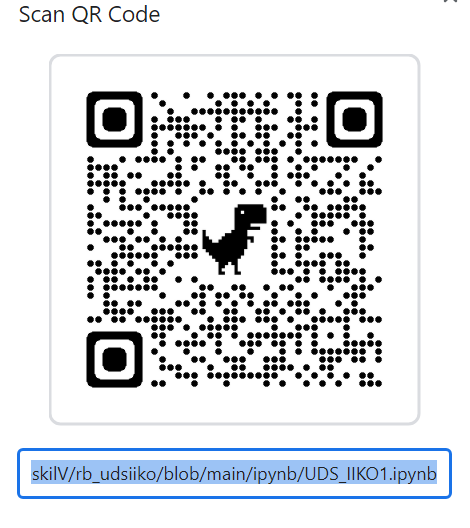

In [1]:
import pandas as pd
import os

In [2]:
import datetime
datetime.datetime.now().strftime('%Y-%m-%d') 

'2023-02-17'

In [4]:
soursefolder = '../data/'
#filesall = 
[entery.name[:15] for entery in os.scandir(soursefolder) if entery.name[0]!='~']
# [_ for _ in enumerate(filesall)]

['iiko_m', 'res', 'UDS']

# defs

In [3]:
def ABC0(df):
    gdf = df.groupby(by='ID Клиента').aggregate({'Клиент':'first','ID операции':'count','Оплата RUB':'sum'})\
    .reset_index().sort_values(by='Оплата RUB', ascending=False).rename(columns={'ID операции':'count'})
    gdf['cumsumОплата RUB'] = gdf['Оплата RUB'].cumsum()
    gdf['percОплата RUB'] = gdf['cumsumОплата RUB']/gdf['Оплата RUB'].sum()
    gdf['ABCОплата RUB'] = gdf['percОплата RUB'].apply(lambda x: 'A1' if x<=0.50 else 'A2' if x<=0.80 else 'B'  if x<=0.95 else 'C')
    print(gdf[['ABCОплата RUB']].value_counts())
    # TODO !!!занесем в df категории
    return gdf
    

In [4]:
def havephone(df):
    print (f" имеем базу {len(df)} строк и {len(df[~df['Телефон'].isna()])} с телефоном\
    это {100*len(df[~df['Телефон'].isna()])/len(df)} процентов")

In [5]:
def havephonebyset(s):
    df = allclients[allclients['ID Клиента'].isin(s)]
    print (f" имеем базу {len(df)} строк и {len(df[~df['Телефон'].isna()])} с телефоном\
    это {100*len(df[~df['Телефон'].isna()])/len(df)} процентов")
    return df

In [6]:
def ABC1(df):
    gdf = df.groupby(by='ID Клиента').aggregate({'Клиент':'first','ID операции':'count','Оплата RUB':'sum'})\
    .reset_index().sort_values(by='Оплата RUB', ascending=False).rename(columns={'ID операции':'count'})
    gdf['cumsumОплата RUB'] = gdf['Оплата RUB'].cumsum()
    gdf['percОплата RUB'] = gdf['cumsumОплата RUB']/gdf['Оплата RUB'].sum()
    gdf['ABCОплата RUB'] = gdf['percОплата RUB'].apply(lambda x: 'A' if x<=0.80 else 'B'  if x<=0.95 else 'C')
    print(gdf[['ABCОплата RUB']].value_counts())
    return gdf

def svod (df):   
    return df.groupby(by='year').aggregate({'ID операции':'count','Оплата RUB':'sum',
                                   'Оплата баллы/ Оплата баллами':'sum',
                                   'Оплата сертификатом':'sum',
                                   'Скидка RUB':'sum'})

In [7]:
#находим подозрительных во всей выборке для этого группируем по дням
def suspicious (df,n):
    
    df_by_date = df[['ID Клиента','date','Клиент','ID операции']]\
       .groupby(by=['date','ID Клиента']).aggregate({'Клиент':'first','ID операции':'count'})\
       .reset_index().rename(columns={'ID операции':'counts'})

    #множество подозрительных и групповых (ходят n и более раз в день)
    return set(df_by_date.loc[df_by_date['counts']>=n,'ID Клиента'].unique())
    

In [8]:
#находим явных читеров, ненормально если 4 и более визитов в  во всей выборке для этого группируем по дням
def suspicious (df,n):
    
    df_by_date = df[['ID Клиента','date','Клиент','ID операции']]\
       .groupby(by=['date','ID Клиента']).aggregate({'Клиент':'first','ID операции':'count'})\
       .reset_index().rename(columns={'ID операции':'counts'})

    #множество подозрительных и групповых (ходят n и более раз в день)
    return set(df_by_date.loc[df_by_date['counts']>=n,'ID Клиента'].unique())
    

# Загрузка данных

## IIKO OLAP_uds1 >> iiko

In [105]:
soursefolder = '../data/OLAP_uds1/'

In [106]:
[x.name for x in os.scandir(soursefolder)]

['2023-10-01_2023-10-31OLAP_uds1.xlsx',
 'experim2023-10-03_2023-10-09OLAP_uds1.xlsx',
 'qwerty.xlsx']

In [107]:
soursefolder = '../data/OLAP_uds1/'
filesall = [entery.name[:15] for entery in os.scandir(soursefolder)\
            if entery.name[0]!='~']

files = [entery.name for entery in os.scandir(soursefolder)\
#           if entery.name[:14]=='OLAP_TZprog_21' 
#           or entery.name[:14]=='OLAP_TZprog_22' 
#           or entery.name[:14]=='OLAP_TZprog_23'\
        ]
[x for x in enumerate(files)]

[(0, '2023-10-01_2023-10-31OLAP_uds1.xlsx'),
 (1, 'experim2023-10-03_2023-10-09OLAP_uds1.xlsx'),
 (2, 'qwerty.xlsx')]

In [108]:
iiko = pd.read_excel(soursefolder+files[0],header = 4)

In [109]:
iiko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355580 entries, 0 to 355579
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Учетный день          63 non-null      object 
 1   Отделение             655 non-null     object 
 2   Номер кассы           665 non-null     object 
 3   Кассир                1328 non-null    object 
 4   Номер чека            138155 non-null  float64
 5   Номер смены           138635 non-null  object 
 6   Номер карты оплаты    216720 non-null  object 
 7   Блюдо                 276346 non-null  object 
 8   Процент скидки        276346 non-null  float64
 9   Unnamed: 9            0 non-null       float64
 10  Тип скидки            117730 non-null  object 
 11  Количество блюд       355580 non-null  int64  
 12  Сумма без скидки, р.  355580 non-null  float64
 13  Сумма со скидкой, р.  355580 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 38.

In [110]:
iiko.columns

Index(['Учетный день', 'Отделение', 'Номер кассы', 'Кассир', 'Номер чека',
       'Номер смены', 'Номер карты оплаты', 'Блюдо', 'Процент скидки',
       'Unnamed: 9', 'Тип скидки', 'Количество блюд', 'Сумма без скидки, р.',
       'Сумма со скидкой, р.'],
      dtype='object')

In [111]:
#Заполняем
list_for_ffill=['Учетный день', 'Отделение', 'Номер кассы', 'Кассир', 'Номер чека',
       'Номер смены', 'Номер карты оплаты']

for file in list_for_ffill:
    iiko[file].ffill(inplace=True)

In [112]:
iiko

,Учетный день,Отделение,Номер кассы,Кассир,Номер чека,Номер смены,Номер карты оплаты,Блюдо,Процент скидки,Unnamed: 9,Тип скидки,Количество блюд,"Сумма без скидки, р.","Сумма со скидкой, р."
0,2022-10-01 00:00:00,203 мкр корпус 22,25,Коркина Полина,35101.0,318,************8445,Плюшка московская 75 г,0.0000,NaN,Скидка утренняя 30%,1,30.00,30.00
1,2022-10-01 00:00:00,203 мкр корпус 22,25,Коркина Полина,35101.0,318,************8445,Шанежка провансаль_ 110 гр,0.3000,NaN,Скидка утренняя 30%,1,75.00,52.50
2,2022-10-01 00:00:00,203 мкр корпус 22,25,Коркина Полина,35101.0,318,************8445 всего,NaN,NaN,NaN,NaN,2,105.00,82.50
3,2022-10-01 00:00:00,203 мкр корпус 22,25,Коркина Полина,35102.0,318,************5155,Кекс домашний с изюмом,0.0000,NaN,NaN,2,70.00,70.00
4,2022-10-01 00:00:00,203 мкр корпус 22,25,Коркина Полина,35102.0,318,************5155,Крендель,0.0000,NaN,NaN,2,92.00,92.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355575,2022-10-31 00:00:00,Юнимолл,11,Валитова Марина Михайловна,122763.0,898,DDDD********1170,Шанежка с картофелем 110 г,0.2965,NaN,UDS Discount,1,55.00,38.69
355576,2022-10-31 00:00:00,Юнимолл,11,Валитова Марина Михайловна,122763.0,898,DDDD********1170 всего,NaN,NaN,NaN,NaN,3,226.00,159.00
355577,2022-10-31 00:00:00,Юнимолл,11,Валитова Марина Михайловна всего,122763.0,898,DDDD********1170 всего,NaN,NaN,NaN,NaN,344,29066.98,26513.58
355578,31.10.2022 всего,Юнимолл,11,Валитова Марина Михайловна всего,122763.0,898,DDDD********1170 всего,NaN,NaN,NaN,NaN,13735,1114191.28,899240.50


In [114]:
#iiko_raw = iiko
#iiko = iiko_raw

In [117]:
iiko = iiko_raw[~iiko_raw['Блюдо'].isna()].copy()
#[['Количество блюд', 'Сумма без скидки, р.',
#       'Сумма со скидкой, р.']].sum()

In [118]:
iiko['Учетный день'] = iiko['Учетный день'].astype('datetime64')

In [119]:
iiko.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276346 entries, 0 to 355575
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Учетный день          276346 non-null  datetime64[ns]
 1   Отделение             276346 non-null  object        
 2   Номер кассы           276346 non-null  object        
 3   Кассир                276346 non-null  object        
 4   Номер чека            276346 non-null  float64       
 5   Номер смены           276346 non-null  object        
 6   Номер карты оплаты    276346 non-null  object        
 7   Блюдо                 276346 non-null  object        
 8   Процент скидки        276340 non-null  float64       
 9   Unnamed: 9            0 non-null       float64       
 10  Тип скидки            117724 non-null  object        
 11  Количество блюд       276346 non-null  int64         
 12  Сумма без скидки, р.  276346 non-null  float64       
 13 

In [ ]:
92148	7610318	6361119.07

In [122]:
iiko[['Количество блюд', 'Сумма без скидки, р.',
       'Сумма со скидкой, р.']].sum()

Количество блюд           418467.00
Сумма без скидки, р.    34561622.49
Сумма со скидкой, р.    28634671.41
dtype: float64

In [608]:
#iiko.to_excel(soursefolder+'qwerty.xlsx')

In [121]:
iiko = iiko[~(iiko['Количество блюд']==0)].copy()

In [123]:
iiko

,Учетный день,Отделение,Номер кассы,Кассир,Номер чека,Номер смены,Номер карты оплаты,Блюдо,Процент скидки,Unnamed: 9,Тип скидки,Количество блюд,"Сумма без скидки, р.","Сумма со скидкой, р."
0,2022-10-01,203 мкр корпус 22,25,Коркина Полина,35101.0,318,************8445,Плюшка московская 75 г,0.0000,NaN,Скидка утренняя 30%,1,30.0,30.00
1,2022-10-01,203 мкр корпус 22,25,Коркина Полина,35101.0,318,************8445,Шанежка провансаль_ 110 гр,0.3000,NaN,Скидка утренняя 30%,1,75.0,52.50
3,2022-10-01,203 мкр корпус 22,25,Коркина Полина,35102.0,318,************5155,Кекс домашний с изюмом,0.0000,NaN,NaN,2,70.0,70.00
4,2022-10-01,203 мкр корпус 22,25,Коркина Полина,35102.0,318,************5155,Крендель,0.0000,NaN,NaN,2,92.0,92.00
5,2022-10-01,203 мкр корпус 22,25,Коркина Полина,35102.0,318,************5155,Круассан с шоколадом,0.0000,NaN,NaN,2,198.0,198.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355571,2022-10-31,Юнимолл,11,Валитова Марина Михайловна,122761.0,898,DDDD********7523,Багет Провансаль с колбасой 150 г,0.1646,NaN,UDS Discount,1,79.0,66.00
355572,2022-10-31,Юнимолл,11,Валитова Марина Михайловна,122762.0,898,DDDD********1461,Багет Провансаль с колбасой 150 г,0.0000,NaN,NaN,1,79.0,79.00
355573,2022-10-31,Юнимолл,11,Валитова Марина Михайловна,122763.0,898,DDDD********1170,Багет Провансаль 150 г,0.2964,NaN,UDS Discount,1,75.0,52.77
355574,2022-10-31,Юнимолл,11,Валитова Марина Михайловна,122763.0,898,DDDD********1170,Закрытая пицца с курицей 120 г,0.2965,NaN,UDS Discount,1,96.0,67.54


##  Загрузка справочника клиентов UDS

In [31]:
allclients = pd.read_excel('../data/UDS/clients/UDS. Клиенты.xlsx', header =1)

C:\Users\diva0\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [32]:
allclients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104552 entries, 0 to 104551
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Регистрация                104552 non-null  object 
 1   ID Клиента                 104552 non-null  int64  
 2   Клиент                     104552 non-null  object 
 3   E-mail                     15258 non-null   object 
 4   Телефон                    44616 non-null   float64
 5   Дата рождения              60317 non-null   object 
 6   По рекомендации участника  91854 non-null   object 
 7   Источник трафика           12590 non-null   object 
 8   ID пригласившего           91854 non-null   float64
 9   Баллы                      104552 non-null  float64
 10  Оплачено (RUB)             104552 non-null  float64
 11  Уровень                    104552 non-null  float64
 12  Рекомендации               104552 non-null  float64
 13  Заметки                    0 

## UDS пекарня, без булочки>> uds

In [9]:
folder_uds = '../data/UDS/'

In [10]:
files = [entery.name for entery in os.scandir(folder_uds)]
[file for file in enumerate(files)]

[(0, '2022-06-01_2022-11-30UDS_P.xlsx'),
 (1, '2022-12-01_2023-01-12UDS_B.xlsx'),
 (2, '2022-12-01_2023-01-12UDS_P.xlsx'),
 (3, 'clients'),
 (4, 'UDS')]

In [11]:
udsp1 = pd.read_excel(folder_uds+files[0], header =1)

C:\Users\diva0\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [12]:
udsp2 = pd.read_excel(folder_uds+files[2], header =1)

In [13]:
uds = pd.concat([udsp1,udsp2])

In [14]:
uds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377556 entries, 0 to 65409
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID операции                   377556 non-null  float64
 1   Дата                          377556 non-null  object 
 2   Номер чека                    373652 non-null  float64
 3   ID Клиента                    377556 non-null  int64  
 4   Клиент                        377556 non-null  object 
 5   Уровень                       377556 non-null  float64
 6   Кассир                        377511 non-null  object 
 7   Тип операции                  377556 non-null  object 
 8   Счет RUB                      377556 non-null  float64
 9   Скидка RUB                    377556 non-null  float64
 10  Оплата RUB                    377556 non-null  float64
 11  Оплата баллы/ Оплата баллами  377556 non-null  float64
 12  Оплата сертификатом           377556 non-null

In [15]:
uds[['Состояние','Тип операции']].value_counts()

Состояние  Тип операции       
Выполнена  Стандартная покупка    369793
Возврат    Стандартная покупка      3859
Отменена   Стандартная покупка      3859
Выполнена  Покупка по прайсу          45
dtype: int64

In [16]:
#Оставить только Выполнено
uds = uds[uds['Состояние']=='Выполнена'].copy()

In [17]:
uds.rename(columns={'Дата':'Дата_text_UDS'}, inplace=True)

In [18]:
uds['datetime'] = uds['Дата_text_UDS'].apply(lambda x: pd.to_datetime(x, format='%d.%m.%Y %H:%M:%S'))

In [19]:
uds['week'] = uds['datetime'].dt.isocalendar().week
uds['day_name'] = uds['datetime'].dt.day_name()
uds['year'] = uds['datetime'].dt.year
uds['month'] = uds['datetime'].dt.month
uds['day'] = uds['datetime'].dt.day

In [20]:
#сделаем колонку с датой без времени
uds['date'] =  pd.to_datetime(uds['datetime'].apply(lambda x: x.date()))

In [21]:
#проверяем
uds[['datetime','date']].sample(10)

,datetime,date
294391,2022-06-11 19:15:04,2022-06-11
7274,2023-01-08 09:18:28,2023-01-08
239948,2022-07-20 10:38:45,2022-07-20
22822,2022-11-18 17:08:12,2022-11-18
256159,2022-07-07 16:24:30,2022-07-07
28432,2022-12-22 17:01:52,2022-12-22
274875,2022-06-24 13:40:46,2022-06-24
49284,2022-12-10 12:40:55,2022-12-10
94333,2022-10-13 09:41:41,2022-10-13
65409,2022-12-01 08:01:04,2022-12-01


In [348]:
#uds.drop(columns='datatime', inplace=True)

In [22]:
uds.sample(10)

,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,...,Оплата сертификатом,Состояние,Филиал,datetime,week,day_name,year,month,day,date
18586,567036021.0,28.12.2022 9:40:04,241753.0,1099556155894,Анастасия Михайловв,1.0,Вершинина.Н.В,Стандартная покупка,328.0,0.0,...,0.0,Выполнена,NaN,2022-12-28 09:40:04,52,Wednesday,2022,12,28,2022-12-28
67715,530091161.0,25.10.2022 17:18:12,63481.0,1099556015510,Валерия Дедюхина,1.0,Соболь И.А.,Стандартная покупка,303.0,0.0,...,0.0,Выполнена,NaN,2022-10-25 17:18:12,43,Tuesday,2022,10,25,2022-10-25
270117,468806940.0,28.06.2022 9:50:52,2889.0,1099559257814,Евдокия Слепцова,1.0,Скрябина.И.В,Стандартная покупка,300.0,0.0,...,0.0,Выполнена,NaN,2022-06-28 09:50:52,26,Tuesday,2022,6,28,2022-06-28
274142,467261662.0,24.06.2022 20:05:00,178765.0,1099572292912,+79142203231,1.0,Игнатьева Татьяна Егоровна,Стандартная покупка,1013.5,0.0,...,0.0,Выполнена,203 мкрн. 8 корпус,2022-06-24 20:05:00,25,Friday,2022,6,24,2022-06-24
180974,500581795.0,31.08.2022 14:39:52,51999.0,1099567566762,+79644262749,1.0,Шейхрамова Р.А,Стандартная покупка,148.0,0.0,...,0.0,Выполнена,NaN,2022-08-31 14:39:52,35,Wednesday,2022,8,31,2022-08-31
71416,529462860.0,24.10.2022 8:59:21,88198.0,1099568304812,Лана Петрова,1.0,Петрова А.Е,Стандартная покупка,233.0,0.0,...,0.0,Выполнена,NaN,2022-10-24 08:59:21,43,Monday,2022,10,24,2022-10-24
132101,513494726.0,24.09.2022 15:13:13,17319.0,1099562367089,Карина Кардашевская,1.0,Маркелова.Е.Н,Стандартная покупка,158.0,0.0,...,0.0,Выполнена,NaN,2022-09-24 15:13:13,38,Saturday,2022,9,24,2022-09-24
292030,460756706.0,13.06.2022 16:10:29,229635.0,1099559851502,Анжела Дмитриева,1.0,Вершинина.Н.В,Стандартная покупка,390.0,0.0,...,0.0,Выполнена,NaN,2022-06-13 16:10:29,24,Monday,2022,6,13,2022-06-13
46832,536076903.0,05.11.2022 14:16:51,31989.0,1099566104758,Алексей Барабанский,1.0,Егорова Е.П.,Стандартная покупка,198.0,0.0,...,0.0,Выполнена,NaN,2022-11-05 14:16:51,44,Saturday,2022,11,5,2022-11-05
82115,526533762.0,18.10.2022 19:22:35,120997.0,1099578179224,+79142736241,1.0,Валитова М.М.,Стандартная покупка,189.7,0.0,...,0.0,Выполнена,NaN,2022-10-18 19:22:35,42,Tuesday,2022,10,18,2022-10-18


In [23]:
#Уникальных клиентов
len(uds['ID Клиента'].unique())

66495

In [24]:
uds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369838 entries, 0 to 65409
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   ID операции                   369838 non-null  float64       
 1   Дата_text_UDS                 369838 non-null  object        
 2   Номер чека                    369793 non-null  float64       
 3   ID Клиента                    369838 non-null  int64         
 4   Клиент                        369838 non-null  object        
 5   Уровень                       369838 non-null  float64       
 6   Кассир                        369793 non-null  object        
 7   Тип операции                  369838 non-null  object        
 8   Счет RUB                      369838 non-null  float64       
 9   Скидка RUB                    369838 non-null  float64       
 10  Оплата RUB                    369838 non-null  float64       
 11  Оплата баллы/ 

# Обработка
В первую очередь подчищаем от данных мешающих статистике

In [26]:
#откат к сырым данным
#uds_row = uds.copy()
#uds = uds_row.copy()

## Визитов в день (исключаем клиентов 4 более операции в день)


In [27]:
uds.columns

Index(['ID операции', 'Дата_text_UDS', 'Номер чека', 'ID Клиента', 'Клиент',
       'Уровень', 'Кассир', 'Тип операции', 'Счет RUB', 'Скидка RUB',
       'Оплата RUB', 'Оплата баллы/ Оплата баллами', 'Оплата сертификатом',
       'Состояние', 'Филиал', 'datetime', 'week', 'day_name', 'year', 'month',
       'day', 'date'],
      dtype='object')

In [28]:
#df таблица в которой подсчитана сумма операций в день по клиенту
df = uds[['ID Клиента','date', 'Клиент','Оплата RUB','ID операции']]\
 .groupby(by=['ID Клиента','date'])\
 .aggregate({'Клиент':'first','Оплата RUB':'sum','ID операции':'count'})


In [29]:
#будем считать что 4 более операции в день это ненормально, нарушает
# статистику (первый столбец - количество операций в день по клиенту, 
# второй столбец - сколько таких клиентов)
df.value_counts('ID операции')

ID операции
1     328321
2      17524
3       1381
4        189
5         66
6         18
7         12
8          9
11         7
9          6
10         5
13         4
12         3
26         3
21         3
17         3
22         2
16         2
15         2
20         1
18         1
29         1
30         1
40         1
41         1
45         1
61         1
62         1
63         1
dtype: int64

### Сохраним и удалим из статистики все операции этих клиентов

In [37]:
#смотрим всего 334 случая превышения, но для чистоты анализа удалим все
#транзакции этих клиентов
df[df['ID операции']>=4].reset_index().sort_values('ID операции',ascending=False)

,ID Клиента,date,Клиент,Оплата RUB,ID операции
166,1099568819101,2022-10-13,Дарья Намитова,14199.7,63
171,1099568819101,2022-10-24,Дарья Намитова,12063.4,62
169,1099568819101,2022-10-20,Дарья Намитова,12534.0,61
165,1099568819101,2022-10-12,Дарья Намитова,9091.5,45
167,1099568819101,2022-10-16,Дарья Намитова,11867.4,41
...,...,...,...,...,...
79,1099559258552,2022-08-29,Влада Юзенко,708.8,4
78,1099559258552,2022-08-14,Влада Юзенко,970.9,4
77,1099559258552,2022-07-16,Влада Юзенко,1087.0,4
75,1099558862851,2022-10-23,Павел Мархакшинов,441.0,4


In [38]:
_.to_excel('4 более операции в день.xlsx')

In [34]:
#множество клиентов имевщих 4 и более чеков в день
clients4moredayset = set(df[df['ID операции']>=4].sort_index()\
                         .reset_index()['ID Клиента'].unique())
len(clients4moredayset)

169

In [35]:
#Это телефоны клиентов 4 более операции в день 
havephonebyset(clients4moredayset)[['Клиент','E-mail','Телефон','Дата рождения']]

 имеем базу 168 строк и 141 с телефоном    это 83.92857142857143 процентов


,Клиент,E-mail,Телефон,Дата рождения
4576,Марина Колышкина,NaN,7.924664e+10,27.03.1969
5625,Николай Кочнев,NaN,7.999175e+10,14.10.1992
7202,Елена Баишева,NaN,7.914288e+10,21.12.1967
7711,Артур Оконешников,NaN,NaN,13.02.2004
10065,Соёлма Молонова,NaN,7.924770e+10,13.07.1999
...,...,...,...,...
103518,Михаил Платонов,NaN,7.965767e+10,16.05.2000
103551,Алёна Слепцова,NaN,7.924174e+10,08.06.1999
103981,Наталья Ефремова,NaN,7.999173e+10,25.08.1997
104089,Марина Артахинова,NaN,7.996315e+10,28.04.1999


In [36]:
_.to_excel('4 более операции в день это ненормально_все_дни.xlsx')

In [39]:
#Вот операции этих клиентов за весь период
uds[uds['ID Клиента'].isin(clients4moredayset)]

,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,...,Оплата сертификатом,Состояние,Филиал,datetime,week,day_name,year,month,day,date
0,550695451.0,30.11.2022 22:23:04,5344.0,1099565969450,Наталья Вершинина,1.0,Соколов Валерий,Стандартная покупка,216.0,0.0,...,0.0,Выполнена,NaN,2022-11-30 22:23:04,48,Wednesday,2022,11,30,2022-11-30
7,550672201.0,30.11.2022 21:36:06,233933.0,1099559989844,Вероника Кузьмина,1.0,Кузьмина В.А,Стандартная покупка,411.0,0.0,...,0.0,Выполнена,NaN,2022-11-30 21:36:06,48,Wednesday,2022,11,30,2022-11-30
17,550654065.0,30.11.2022 20:58:58,8128.0,1099577437494,нюргуяна романова,1.0,Романова Н.В,Стандартная покупка,344.0,0.0,...,0.0,Выполнена,NaN,2022-11-30 20:58:58,48,Wednesday,2022,11,30,2022-11-30
18,550652724.0,30.11.2022 20:55:47,8127.0,1099577437494,нюргуяна романова,1.0,Романова Н.В,Стандартная покупка,103.2,0.0,...,0.0,Выполнена,NaN,2022-11-30 20:55:47,48,Wednesday,2022,11,30,2022-11-30
35,550642184.0,30.11.2022 20:31:30,45512.0,1099574317947,Анита Durova,1.0,Дурова А,Стандартная покупка,207.0,0.0,...,0.0,Выполнена,NaN,2022-11-30 20:31:30,48,Wednesday,2022,11,30,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65066,550891941.0,01.12.2022 10:31:50,74493.0,1099555647222,Сахаайа Никанорова,1.0,Молонова С.Н,Стандартная покупка,228.0,0.0,...,0.0,Выполнена,NaN,2022-12-01 10:31:50,48,Thursday,2022,12,1,2022-12-01
65223,550888628.0,01.12.2022 9:32:17,36240.0,1099551926183,Наталья Ефремова,1.0,Уарова.Я.М,Стандартная покупка,75.0,0.0,...,0.0,Выполнена,NaN,2022-12-01 09:32:17,48,Thursday,2022,12,1,2022-12-01
65251,550888207.0,01.12.2022 9:19:03,233953.0,1099562446655,Миша Софронов,1.0,Кузьмина В.А,Стандартная покупка,372.0,0.0,...,0.0,Выполнена,NaN,2022-12-01 09:19:03,48,Thursday,2022,12,1,2022-12-01
65259,550888151.0,01.12.2022 9:16:16,8133.0,1099564406955,Ариана Николаева,1.0,Христофорова А.,Стандартная покупка,140.0,0.0,...,0.0,Выполнена,NaN,2022-12-01 09:16:16,48,Thursday,2022,12,1,2022-12-01


In [40]:
#Сумма '4 более операции в день это ненормально_все_дни.xlsx'
#8563 операций	1626300.68 оплата	141947.32 оплата баллами	1932.0	

svod(_)

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,8660,1634947.78,142895.22,1932.0,0.0
2023,238,54223.34,5993.36,0.0,0.0


In [401]:
#uds_row = uds.copy()

In [41]:
len(uds_row)

369838

In [42]:
#!!!!! Удаляем 4 и более оопераций в день
uds = uds[~uds['ID Клиента'].isin(clients4moredayset)].copy()

## Анализ всех покупок по среднему чеку ('cut_avgcheck')
Вводим распределение всех продаж по среднему чеку
uds['cut_avgcheck']

In [43]:
uds.columns

Index(['ID операции', 'Дата_text_UDS', 'Номер чека', 'ID Клиента', 'Клиент',
       'Уровень', 'Кассир', 'Тип операции', 'Счет RUB', 'Скидка RUB',
       'Оплата RUB', 'Оплата баллы/ Оплата баллами', 'Оплата сертификатом',
       'Состояние', 'Филиал', 'datetime', 'week', 'day_name', 'year', 'month',
       'day', 'date'],
      dtype='object')

In [45]:
uds[['ID операции', 'Дата_text_UDS','Номер чека',
     'ID Клиента', 'Клиент','Оплата RUB']]\
.sort_values('Оплата RUB', ascending=False)

,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Оплата RUB
16498,567834290.0,29.12.2022 11:20:13,12685.0,1099556797360,Александр Конторусов,10077.00
265269,470242434.0,01.07.2022 9:09:10,26268.0,1099559455669,Ekaterina Sivtceva,8262.00
28876,563289697.0,22.12.2022 13:44:22,8793.0,1099581895826,+79141106070,6418.00
247195,476812000.0,14.07.2022 12:17:15,244539.0,1099573684686,ИННА Аммосова,6090.00
29989,562855675.0,21.12.2022 19:14:12,97510.0,1099580953139,Юлия Трофимова,5700.00
...,...,...,...,...,...,...
18435,545065039.0,21.11.2022 13:13:04,36304.0,1099579223067,+79148279001,5.00
65172,550889126.0,01.12.2022 9:45:50,38888.0,1099573826333,Ольга Степанищева,5.00
60086,552356229.0,03.12.2022 19:52:21,39540.0,1099555229357,Святослав Сляднев,5.00
36964,539417620.0,11.11.2022 10:45:56,92876.0,1099580648174,Полина Маккормик,5.00


<AxesSubplot:>

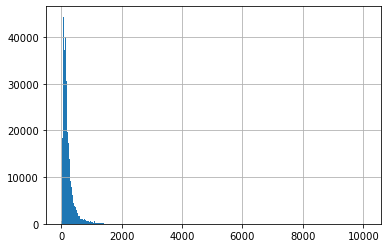

In [46]:
uds['Оплата RUB'].hist(bins = 400)

<AxesSubplot:>

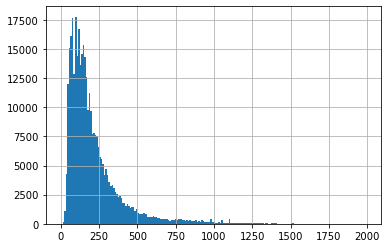

In [47]:
uds.loc[uds['Оплата RUB']<2000,'Оплата RUB'].hist(bins = 200)

<AxesSubplot:>

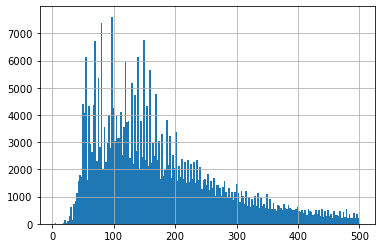

In [48]:
uds.loc[uds['Оплата RUB']<500,'Оплата RUB'].hist(bins=200)

In [49]:
cut_bins = [0, 100, 200, 750, 1500, 100000]
cut_labels = ['0-100', '100-200', '200-750', '750-1500','>1500']
uds['cut_avgcheck'] = pd.cut(uds['Оплата RUB'],
                       bins=cut_bins,
                      labels=cut_labels)

In [50]:
#Распределение всех продаж по среднему чеку
uds['cut_avgcheck'].value_counts()

100-200     133790
200-750     122950
0-100        93751
750-1500      9697
>1500          752
Name: cut_avgcheck, dtype: int64

### Cписок часто покупающих на сумму более 3000 руб (Андрей Крылов, Роза Шейхрамова ...)

In [54]:
#список купивших на сумму более 3000 руб 
uds[uds['Оплата RUB']>3000][['ID операции', 'Дата_text_UDS', 'Номер чека', 'ID Клиента', 'Клиент',
       'Скидка RUB', 'Оплата RUB',]]

,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Скидка RUB,Оплата RUB
33487,540661657.0,13.11.2022 12:19:27,665.0,1099574768293,Андрей Крылов,0.0,3989.0
44392,536945086.0,07.11.2022 10:32:05,65851.0,1099579311427,+79142297756,0.0,3353.0
78656,527319813.0,20.10.2022 13:37:32,89913.0,1099559992438,+79142701017,0.0,3061.0
111068,519405238.0,05.10.2022 9:41:04,144082.0,1099574768293,Андрей Крылов,0.0,3720.0
123931,515621492.0,28.09.2022 16:02:27,86631.0,1099555886332,Евгения Румянцева,0.0,3194.6
127482,514948244.0,27.09.2022 9:34:45,65903.0,1099556887839,Роза Шейхрамова,0.0,5672.5
127509,514947965.0,27.09.2022 9:26:30,65903.0,1099556887839,Роза Шейхрамова,0.0,5672.5
145403,510290868.0,18.09.2022 16:16:48,85060.0,1099576615105,Сергей Горбунов,0.0,3294.0
161792,505867488.0,10.09.2022 10:28:45,18146.0,1099574768293,Андрей Крылов,0.0,3279.0
173423,502823455.0,04.09.2022 14:06:23,16648.0,1099574768293,Андрей Крылов,0.0,3077.0


## Общая информация 2022 за 7 месяцев

In [51]:
# исследуем 2022 год
uds = uds[uds['year']==2022]
uds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348915 entries, 1 to 65409
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   ID операции                   348915 non-null  float64       
 1   Дата_text_UDS                 348915 non-null  object        
 2   Номер чека                    348870 non-null  float64       
 3   ID Клиента                    348915 non-null  int64         
 4   Клиент                        348915 non-null  object        
 5   Уровень                       348915 non-null  float64       
 6   Кассир                        348870 non-null  object        
 7   Тип операции                  348915 non-null  object        
 8   Счет RUB                      348915 non-null  float64       
 9   Скидка RUB                    348915 non-null  float64       
 10  Оплата RUB                    348915 non-null  float64       
 11  Оплата баллы/ 

In [55]:
print (f" Всего за период с {uds['datetime'].min().strftime('%d.%m.%Y')} по {uds['datetime'].max().strftime('%d.%m.%Y')} \
{len(uds)} чеков по UDS, количество уникальных клиентов {len(uds['ID Клиента'].unique())}")

 Всего за период с 01.06.2022 по 31.12.2022 348915 чеков по UDS, количество уникальных клиентов 64973


## Сводная таблица по суммам оплаты, оплаты баллами и сертификатами

In [56]:
#Смотрим общую сумму за период данных
uds.groupby(by='year').aggregate({'ID операции':'count','Оплата RUB':'sum',
                                   'Оплата баллы/ Оплата баллами':'sum',
                                   'Оплата сертификатом':'sum',
                                   'Скидка RUB':'sum'})

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,348915,75302981.38,6962869.6,83085.7,0.0


In [57]:
#По месяцам с суммами
uds_groupby_money = uds.groupby(by='month').aggregate({'ID операции':'count','Оплата RUB':'sum',
                                   'Оплата баллы/ Оплата баллами':'sum',
                                   'Оплата сертификатом':'sum',
                                   'Скидка RUB':'sum'})
uds_groupby_money

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
month,,,,,
6,44908,9106490.30,742731.30,11850.3,0.0
7,37922,7998208.19,624876.91,195.0,0.0
8,43323,9532985.36,831063.54,1513.0,0.0
9,58527,12059103.51,1211289.89,54814.6,0.0
10,60763,12855261.63,1333569.27,1219.8,0.0
11,52761,11462296.68,1082614.42,1019.9,0.0
12,50711,12288635.71,1136724.27,12473.1,0.0


# Анализ пробной группы клиентов - супер клиентов которые все 7 месяцев прошлого года каждый месяц приходят хоть 1 раз (время жизни клиента более 6 месяцев )

In [59]:
#Группировка  по клиентам и месяцам - посмотрим сколько раз в месяц ходят клиенты
uds_by_clnt = uds.groupby(by=['month','ID Клиента'])\
       .aggregate({'Клиент':'first','Оплата RUB':'sum','Оплата баллы/ Оплата баллами':'sum','Оплата сертификатом':'sum','ID операции':'count'}).reset_index()\
       .sort_values(by='Оплата RUB', ascending=False)\
       .rename(columns={ 'ID операции':'чеков'})
uds_by_clnt

,month,ID Клиента,Клиент,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,чеков
72998,9,1099574768293,Андрей Крылов,20360.5,2677.0,0.0,11
96750,10,1099574768293,Андрей Крылов,16833.0,0.0,0.0,7
52646,8,1099574768293,Андрей Крылов,16261.0,0.0,0.0,6
61048,9,1099556887839,Роза Шейхрамова,15820.0,434.0,29.0,19
128307,12,1099555471162,Валентина Петрова,15460.6,1251.0,0.0,16
...,...,...,...,...,...,...,...
146740,12,1099581587527,+79246685581,10.0,0.0,0.0,1
99213,10,1099577195042,Семен Кириллин,5.0,0.0,0.0,1
26925,7,1099559929593,Оксана Фиськова,5.0,0.0,0.0,1
103920,10,1099579017084,+79142616170,5.0,0.0,0.0,1


In [60]:
# Множества клиентов по месяцам
clntset = {}
for m in range(6,13):
    clntset[m] = set(uds_by_clnt.loc[uds_by_clnt['month']==m,'ID Клиента'])

In [61]:
# имеем суперклиентов
superclnset = set.intersection(clntset[6],clntset[7],clntset[8]
                ,clntset[9],clntset[10],clntset[11],clntset[12])
len(superclnset)

1989

In [62]:
uds_superclnts = uds[uds['ID Клиента'].isin(superclnset)]
uds_superclnts['Клиент'].value_counts()

Татьяна Анисимова     207
Клара Каназарова      164
иван бухаров          162
Наталья Кухарева      152
Екатерина Иванова     145
                     ... 
Валентина Старцева      8
Мария Галаева           8
Елисей Лукьянов         8
Анна Дьячковская        7
Оля П                   2
Name: Клиент, Length: 1956, dtype: int64

## Общая информация по группе суперклиентов


In [63]:
#В поисках идеального клиента сузили количество клиентов до суперклиентов (т.е. Клиенты - время жизни которых более 6 мес)
#период ABC анализа 7 мес с 01

In [64]:
#df - база только суперклиентов
df = uds[uds['ID Клиента'].isin(superclnset)]

In [65]:
print (f" Всего за период с {df['datetime'].min().strftime('%d.%m.%Y')} по {df['datetime'].max().strftime('%d.%m.%Y')} \
{len(df)} чеков по UDS, количество уникальных клиентов {len(df['ID Клиента'].unique())}")

 Всего за период с 01.06.2022 по 31.12.2022 66390 чеков по UDS, количество уникальных клиентов 1989


### Количество дней в исследуемом периде diffdays

In [66]:
#Количество дней в исследуемом периде 
diffdays = (df['datetime'].max()-df['datetime'].min()).days
diffdays

213

In [67]:
df.groupby(by='year').aggregate({'ID операции':'count','Оплата RUB':'sum',
                                   'Оплата баллы/ Оплата баллами':'sum',
                                   'Оплата сертификатом':'sum',
                                   'Скидка RUB':'sum'})

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,66390,13280629.07,1475162.03,14968.4,0.0


In [68]:
#Данные всей выборки по сумме
uds.groupby(by='year').aggregate({'ID операции':'count','Оплата RUB':'sum',
                                   'Оплата баллы/ Оплата баллами':'sum',
                                   'Оплата сертификатом':'sum',
                                   'Скидка RUB':'sum'})

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,348915,75302981.38,6962869.6,83085.7,0.0


In [69]:
#Средний чек по этой группе немного ниже
13280629.07/66390, 75302981.38/348915

(200.03960039162524, 215.8204186693034)

In [70]:
#Процент группы по выручке хороший для анализа
100*13280629.07/75302981.38

17.636259317519205

In [71]:
#при этом по количеству клиентов
len(uds['ID Клиента'].unique()), len(df['ID Клиента'].unique())

(64973, 1989)

In [72]:
len(df['ID Клиента'].unique())/len(uds['ID Клиента'].unique())

0.03061271605128284

!!! 3% по численности суперклиентов клиентов дает 17% выручки 

## Произведем АВС анализ этой группы

In [73]:
dfABC = ABC0(df)

ABCОплата RUB
A2               632
B                528
A1               513
C                316
dtype: int64


In [74]:
dfABC

,ID Клиента,Клиент,count,Оплата RUB,cumsumОплата RUB,percОплата RUB,ABCОплата RUB
492,1099555739354,Георгий Птицын,137,38048.70,38048.70,0.002865,A1
292,1099555215524,Екатерина Иванова,114,37800.60,75849.30,0.005711,A1
1602,1099562994900,Надежда Макарова,63,34941.70,110791.00,0.008342,A1
756,1099556397923,Виталий Журавский,103,34647.90,145438.90,0.010951,A1
1425,1099560013378,Макс Сем,101,33421.13,178860.03,0.013468,A1
...,...,...,...,...,...,...,...
1476,1099560955823,+79248736615,9,920.00,13277376.87,0.999755,C
998,1099557336937,Елена Черемкина,17,918.50,13278295.37,0.999824,C
1136,1099557923599,Анна Андреева,8,846.60,13279141.97,0.999888,C
709,1099556266549,Наталия Каплина,8,831.10,13279973.07,0.999951,C


In [75]:
dfABC['средний_чек213'] = dfABC['Оплата RUB']/dfABC['count']

In [76]:
dfABC.groupby(by='ABCОплата RUB').aggregate({'ID Клиента':'count','count':'sum',
  'Оплата RUB':'sum','средний_чек213':'mean'}).reset_index().sort_values(by='ABCОплата RUB')

,ABCОплата RUB,ID Клиента,count,Оплата RUB,средний_чек213
0,A1,513,28384,6640163.33,280.988003
1,A2,632,20525,3982693.41,226.321182
2,B,528,12189,1990988.93,182.215666
3,C,316,5292,666783.40,136.237514


In [ ]:
  # TODO !!!занесем в df категории

## Разбор категорий A B C по общему количеству посещений

213 51.0 4.176470588235294


<AxesSubplot:>

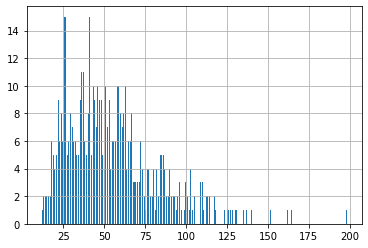

In [77]:
#Гистограмма показывает х - количество всего посещений за период 213 дней y - сколько клиентов

print(diffdays, dfABC.loc[dfABC['ABCОплата RUB']=='A1','count'].median(), 
     diffdays/dfABC.loc[dfABC['ABCОплата RUB']=='A1','count'].median())
dfABC.loc[dfABC['ABCОплата RUB']=='A1','count'].hist(bins=300)

4.176470588235294 4.987928093568766


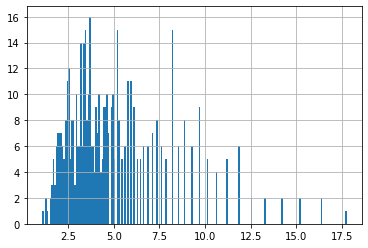

In [81]:
#Гистограмма показывает х - раз во сколько дней ходит клиент y - сколько клиентов
dfABC.loc[dfABC['ABCОплата RUB']=='A1','count']\
    .apply(lambda x: diffdays/x).hist(bins=200)
print(dfABC.loc[dfABC['ABCОплата RUB']=='A1','count']\
    .apply(lambda x: diffdays/x).median(),
dfABC.loc[dfABC['ABCОплата RUB']=='A1','count']\
    .apply(lambda x: diffdays/x).mean()
     )

7.344827586206897 7.776155905933606


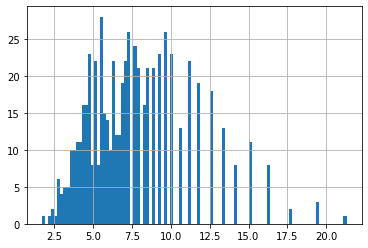

In [557]:
#Гистограмма показывает х - раз во сколько дней ходит клиент y - сколько клиентов
dfABC.loc[dfABC['ABCОплата RUB']=='A2','count']\
    .apply(lambda x: diffdays/x).hist(bins=100)
print(dfABC.loc[dfABC['ABCОплата RUB']=='A2','count']\
    .apply(lambda x: diffdays/x).median(),
dfABC.loc[dfABC['ABCОплата RUB']=='A2','count']\
    .apply(lambda x: diffdays/x).mean()
     )

10.142857142857142 10.424743129234441


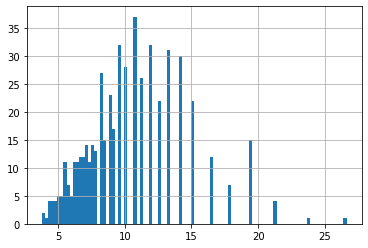

In [82]:
#Гистограмма показывает х - раз во сколько дней ходит клиент y - сколько клиентов
dfABC.loc[dfABC['ABCОплата RUB']=='B','count']\
    .apply(lambda x: diffdays/x).hist(bins=100)
print(dfABC.loc[dfABC['ABCОплата RUB']=='B','count']\
    .apply(lambda x: diffdays/x).median(),
dfABC.loc[dfABC['ABCОплата RUB']=='B','count']\
    .apply(lambda x: diffdays/x).mean()
     )

13.3125 14.19709799257788


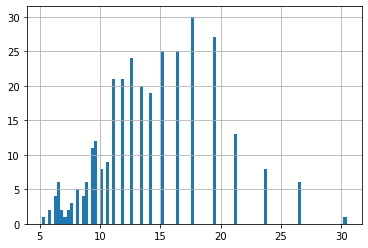

In [83]:
#Гистограмма показывает х - раз во сколько дней ходит клиент y - сколько клиентов
dfABC.loc[dfABC['ABCОплата RUB']=='C','count']\
    .apply(lambda x: diffdays/x).hist(bins=100)
print(dfABC.loc[dfABC['ABCОплата RUB']=='C','count']\
    .apply(lambda x: diffdays/x).median(),
dfABC.loc[dfABC['ABCОплата RUB']=='C','count']\
    .apply(lambda x: diffdays/x).mean()
     )

## Изучение динамики ABC суперклиентов по месяцам

### superclnset - множество супер клиентов, uds_superclnts - продажи суперклиентов по чекам

In [84]:
uds_superclnts = uds[uds['ID Клиента'].isin(superclnset)] 

In [85]:
uds_superclnts.columns

Index(['ID операции', 'Дата_text_UDS', 'Номер чека', 'ID Клиента', 'Клиент',
       'Уровень', 'Кассир', 'Тип операции', 'Счет RUB', 'Скидка RUB',
       'Оплата RUB', 'Оплата баллы/ Оплата баллами', 'Оплата сертификатом',
       'Состояние', 'Филиал', 'datetime', 'week', 'day_name', 'year', 'month',
       'day', 'date', 'cut_avgcheck'],
      dtype='object')

### Присоеденить к продажам метки ABC

In [87]:
uds_superclnts = pd.merge(left=uds_superclnts, right=dfABC[['ID Клиента','ABCОплата RUB']],
        how='left', left_on='ID Клиента', right_on='ID Клиента')

In [88]:
# Подготовим для среднего чека, они пока равны, тк uds_superclnts по 1 чеку
uds_superclnts[ 'Ср чек RUB'] = uds_superclnts[ 'Оплата RUB']

In [89]:
uds_superclnts[uds_superclnts['ABCОплата RUB']=='A1'].groupby(by='month')\
   .aggregate({'ID операции':'count', 'Оплата RUB':'sum',
               'Оплата баллы/ Оплата баллами':'sum', 'Ср чек RUB':'mean'})
# A1

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Ср чек RUB
month,,,,
6,3889,888035.79,84764.41,228.345536
7,3865,852593.17,78578.13,220.593317
8,4019,919520.88,95346.52,228.793451
9,4454,1004857.02,116381.98,225.607773
10,4445,1053065.70,123479.20,236.910169
11,4015,971397.35,101398.55,241.942055
12,3697,950693.42,96212.28,257.152670


In [90]:
uds_superclnts[uds_superclnts['ABCОплата RUB']=='A2'].groupby(by='month')\
   .aggregate({'ID операции':'count', 'Оплата RUB':'sum',
               'Оплата баллы/ Оплата баллами':'sum', 'Ср чек RUB':'mean'})
# A2

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Ср чек RUB
month,,,,
6,3111,571518.45,57023.15,183.708920
7,2648,491322.82,49587.78,185.544872
8,2810,524357.49,57066.81,186.604089
9,3241,621167.55,77317.15,191.659226
10,3182,621583.67,79011.03,195.343705
11,2869,578080.82,64547.58,201.492095
12,2664,574662.61,62443.99,215.714193


In [91]:
uds_superclnts[uds_superclnts['ABCОплата RUB']=='B'].groupby(by='month')\
   .aggregate({'ID операции':'count', 'Оплата RUB':'sum',
               'Оплата баллы/ Оплата баллами':'sum', 'Ср чек RUB':'mean'})
# B

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Ср чек RUB
month,,,,
6,1784,270736.21,28406.79,151.757965
7,1632,248332.28,24843.62,152.164387
8,1707,282472.51,34706.79,165.478916
9,1935,300593.64,41875.46,155.345550
10,1895,309983.19,42694.21,163.579520
11,1647,284057.16,35674.14,172.469435
12,1589,294813.94,34226.56,185.534261


# Контакты, возраст и прочая информация по группе

### Сколько имеем номеров телефонов

In [92]:
havephone(allclients[allclients['ID Клиента'].isin(superclnset)])

 имеем базу 1989 строк и 1733 с телефоном    это 87.12921065862243 процентов


In [93]:
df_contacts = havephonebyset(superclnset).copy()

 имеем базу 1989 строк и 1733 с телефоном    это 87.12921065862243 процентов


### Возраст группы

In [94]:
df_contacts[['Дата рождения', 'Клиент']]

,Дата рождения,Клиент
4956,01.12.1983,Мария Андреева
5984,03.05.1959,Галина Николаевна
9241,15.01.2007,Полина Маккормик
10566,09.11.1975,Анна Кудрявцева
10682,10.08.1964,Мадасов Анатолий
...,...,...
104502,21.12.1989,Zoya Mixajlova
104537,10.06.1982,Наталия Старостина
104539,18.10.1988,Алина Павлова
104547,14.10.1999,Айталина Семенова


In [95]:
df_contacts.loc[df_contacts['Дата рождения'].isna(),['Дата рождения', 'Клиент']]

,Дата рождения,Клиент
14116,NaN,Василий Кондаков
35211,NaN,+79834687207
35912,NaN,Соколова Марина
36698,NaN,Сахая Куличкина
37614,NaN,Галина Иванова
...,...,...
102745,NaN,Виктория Трофимова
103315,NaN,Варвара Кондакова
103959,NaN,Надежда К
104152,NaN,Сардана Устинова


In [96]:
df_contacts['age'] = (datetime.datetime.now() - pd.to_datetime(allclients['Дата рождения'])).astype('<m8[Y]')

<AxesSubplot:>

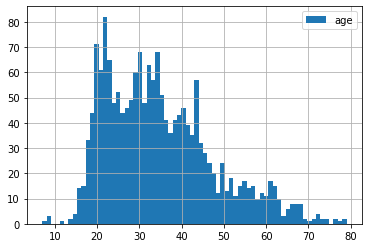

In [98]:
df_contacts['age'].hist(bins=70, legend=True)

In [99]:
age_bins = [0, 16, 25, 40, 50, 100]
age_labels = ['0-16', '16-25', '25-40', '40-50','>50']
df_contacts['cutage'] = pd.cut(df_contacts['age'],
                       bins=age_bins,
                      labels=age_labels)

In [100]:
#TODO посмотреть по категориям
df_contacts = pd.merge(left=df_contacts, right=dfABC[['ID Клиента', 'ABCОплата RUB']],
        how='left',
        left_on='ID Клиента',right_on='ID Клиента')

In [101]:
df_contacts

,Регистрация,ID Клиента,Клиент,E-mail,Телефон,Дата рождения,По рекомендации участника,Источник трафика,ID пригласившего,Баллы,Оплачено (RUB),Уровень,Рекомендации,Заметки,Статус,Дата последней покупки,Теги,age,cutage,ABCОплата RUB
0,05.01.2023 14:48:06,1099582524372,Мария Андреева,sofina0112@mail.ru,7.984113e+10,01.12.1983,Григорьева Т.Н.,UDS App,2.748784e+11,643.50,5835.00,1.0,0.0,NaN,Любимый покупатель,11.01.2023 16:21:58,NaN,40.0,25-40,B
1,26.12.2022 14:32:56,1099582091261,Галина Николаевна,NaN,7.924166e+10,03.05.1959,Кретова Татьяна Николаевна,NaN,2.748784e+11,791.58,9535.80,1.0,0.0,NaN,Любимый покупатель,10.02.2023 17:25:38,NaN,63.0,>50,B
2,01.12.2022 22:33:40,1099580648174,Полина Маккормик,polindjaizer@gmail.com,7.914281e+10,15.01.2007,Муканбетова А.И.,UDS App,2.748784e+11,1026.14,11355.40,1.0,0.0,NaN,Любимый покупатель,28.01.2023 17:13:12,NaN,16.0,0-16,A1
3,24.11.2022 10:55:33,1099580231704,Анна Кудрявцева,NaN,7.914272e+10,09.11.1975,Бирюкова Наталья Николаевна,UDS App,2.748784e+11,245.78,4028.80,1.0,0.0,NaN,Любимый покупатель,13.01.2023 12:20:54,NaN,47.0,40-50,B
4,23.11.2022 15:25:45,1099580199262,Мадасов Анатолий,NaN,7.924370e+10,10.08.1964,Дуйшеев Бекболсун,UDS App,2.748785e+11,352.55,16095.50,1.0,0.0,NaN,Любимый покупатель,08.02.2023 17:25:16,NaN,58.0,>50,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,26.04.2021 12:37:53,1099551037906,Zoya Mixajlova,NaN,7.968157e+10,21.12.1989,NaN,NaN,NaN,144.63,12039.31,1.0,0.0,NaN,Любимый покупатель,01.02.2023 19:23:38,NaN,33.0,25-40,A2
1985,26.04.2021 10:16:57,1099551036724,Наталия Старостина,NaN,7.914112e+10,10.06.1982,Мария Пак,NaN,1.099551e+12,115.55,5926.30,3.0,2.0,NaN,Любимый покупатель,22.01.2023 15:14:48,NaN,40.0,25-40,B
1986,26.04.2021 10:16:28,1099551036719,Алина Павлова,a1ina@bk.ru,7.914293e+10,18.10.1988,Мария Пак,NaN,1.099551e+12,81.13,7756.86,3.0,2.0,NaN,Любимый покупатель,08.02.2023 13:34:00,NaN,34.0,25-40,C
1987,24.04.2021 11:36:17,1099550970256,Айталина Семенова,NaN,7.914291e+10,14.10.1999,NaN,NaN,NaN,194.79,9042.70,1.0,1.0,NaN,Любимый покупатель,11.12.2022 16:52:57,NaN,23.0,16-25,A2


In [102]:
df_contacts.to_excel('контакты суперклиентов по ABC.xlsx')

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

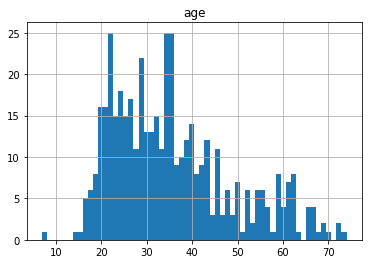

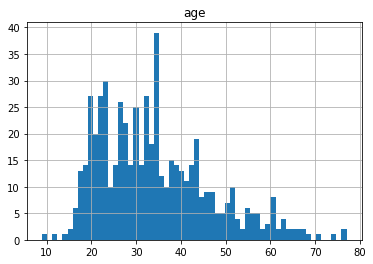

In [103]:
pd.DataFrame.hist(df_contacts.loc[df_contacts['ABCОплата RUB']=='A1',['age']], bins=60)
pd.DataFrame.hist(df_contacts.loc[df_contacts['ABCОплата RUB']=='A2',['age']], bins=60)

# Анализ корзины группы
Надо загрузить данные IIKO

## uds_superclnts10 - продажи суперклиентов по чекам, посмотрим на примере Октября 2022 

In [124]:
uds_superclnts10 = uds_superclnts[uds_superclnts['month']==10]

In [125]:
uds_superclnts10

,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,...,datetime,week,day_name,year,month,day,date,cut_avgcheck,ABCОплата RUB,Ср чек RUB
9239,533518098.0,31.10.2022 22:54:30,303344.0,1099564273007,Яна Уарова,1.0,Уарова.Я.М,Стандартная покупка,76.8,0.0,...,2022-10-31 22:54:30,44,Monday,2022,10,31,2022-10-31,0-100,A1,76.8
9240,533482259.0,31.10.2022 21:37:08,303311.0,1099559926975,Сайдам Васильев,1.0,Уарова.Я.М,Стандартная покупка,180.8,0.0,...,2022-10-31 21:37:08,44,Monday,2022,10,31,2022-10-31,100-200,A2,180.8
9241,533474581.0,31.10.2022 21:19:32,303297.0,1099567038734,Юрий Шестаков,1.0,Уарова.Я.М,Стандартная покупка,98.4,0.0,...,2022-10-31 21:19:32,44,Monday,2022,10,31,2022-10-31,0-100,A2,98.4
9242,533468343.0,31.10.2022 21:04:55,303285.0,1099557583616,Гаврильева Мираида,1.0,Уарова.Я.М,Стандартная покупка,110.4,0.0,...,2022-10-31 21:04:55,44,Monday,2022,10,31,2022-10-31,100-200,A2,110.4
9243,533464671.0,31.10.2022 21:00:32,3272.0,1099559308924,Семен С,1.0,Охлопкова А.,Стандартная покупка,176.0,0.0,...,2022-10-31 21:00:32,44,Monday,2022,10,31,2022-10-31,100-200,B,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19566,517306151.0,01.10.2022 9:18:40,20805.0,1099555471260,Алик Анёха,1.0,Кретова Татьяна Николаевна,Стандартная покупка,469.0,0.0,...,2022-10-01 09:18:40,39,Saturday,2022,10,1,2022-10-01,200-750,A1,469.0
19567,517306066.0,01.10.2022 9:15:12,86998.0,1099555621532,Матрена Матвеева,1.0,Бурдуковская Э.В.,Стандартная покупка,595.0,0.0,...,2022-10-01 09:15:12,39,Saturday,2022,10,1,2022-10-01,200-750,A1,416.5
19568,517305667.0,01.10.2022 9:00:52,86996.0,1099564907075,Даниэл Каназаров,1.0,Бурдуковская Э.В.,Стандартная покупка,123.0,0.0,...,2022-10-01 09:00:52,39,Saturday,2022,10,1,2022-10-01,100-200,A1,123.0
19569,517305040.0,01.10.2022 8:59:28,86995.0,1099555736943,Татьяна Томских,1.0,Бурдуковская Э.В.,Стандартная покупка,242.0,0.0,...,2022-10-01 08:59:28,39,Saturday,2022,10,1,2022-10-01,200-750,B,242.0


In [126]:
iiko.columns

Index(['Учетный день', 'Отделение', 'Номер кассы', 'Кассир', 'Номер чека',
       'Номер смены', 'Номер карты оплаты', 'Блюдо', 'Процент скидки',
       'Unnamed: 9', 'Тип скидки', 'Количество блюд', 'Сумма без скидки, р.',
       'Сумма со скидкой, р.'],
      dtype='object')

In [726]:
uds_superclnts.columns

Index(['ID операции', 'Дата_text_UDS', 'Номер чека', 'ID Клиента', 'Клиент',
       'Уровень', 'Кассир', 'Тип операции', 'Счет RUB', 'Скидка RUB',
       'Оплата RUB', 'Оплата баллы/ Оплата баллами', 'Оплата сертификатом',
       'Состояние', 'Филиал', 'datetime', 'week', 'day_name', 'year', 'month',
       'day', 'date', 'cut_avgcheck'],
      dtype='object')

In [129]:
#griiko группировка по дате и чеку
griiko = iiko.groupby(by=['Учетный день','Номер чека']).aggregate({'Отделение':'first',
                'Номер кассы':'first', 'Кассир':'first','Сумма со скидкой, р.':'sum'})\
                .reset_index()

In [131]:
merged = pd.merge(left=uds_superclnts10, right=griiko,
        how='left',
        right_on=['Учетный день','Номер чека'],
        left_on=['date','Номер чека'])

In [137]:
merged.groupby(by='Отделение').sum()[['Оплата RUB',  'Сумма со скидкой, р.']]

,Оплата RUB,"Сумма со скидкой, р."
Отделение,,
50 лет октября 6,93263.55,93606.47
Авиационная 3,22766.90,28369.04
Алексеева 7,95695.81,95695.70
ДОСТАВКА Кузьмина 26\4,1026.00,3220.95
Дзержинского 1,95660.17,95659.93
Дзержинского 30а,147960.79,158500.49
Дзержинского 42 к.3,36915.96,37217.09
Кирова 13,69064.36,71054.09
Кирова 20,66501.95,66696.95


<AxesSubplot:>

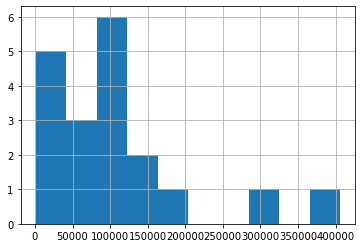

In [138]:
merged.groupby(by='Отделение').sum()['Оплата RUB'].hist()

In [134]:
merged.columns

Index(['ID операции', 'Дата_text_UDS', 'Номер чека', 'ID Клиента', 'Клиент',
       'Уровень', 'Кассир_x', 'Тип операции', 'Счет RUB', 'Скидка RUB',
       'Оплата RUB', 'Оплата баллы/ Оплата баллами', 'Оплата сертификатом',
       'Состояние', 'Филиал', 'datetime', 'week', 'day_name', 'year', 'month',
       'day', 'date', 'cut_avgcheck', 'ABCОплата RUB', 'Ср чек RUB',
       'Учетный день', 'Отделение', 'Номер кассы', 'Кассир_y',
       'Сумма со скидкой, р.'],
      dtype='object')

In [760]:
#iiko_bascets = 
s = set()

iiko['Блюдо'].apply(lambda x: x)

0                 Булочка с помадкой 115 г
1                    Самса с курицей 140 г
2                   Кекс домашний с изюмом
3                           Эчпочмак 100 г
5                      Пончик жареный 85 г
                       ...                
78574    Пирожок с яйцом и зел. луком 60 г
78575               Багет Провансаль 150 г
78576      Булочка Улитка (с изюмом) 100 г
78578                             Крендель
78579                        Хачапури 90 г
Name: Блюдо, Length: 61105, dtype: object

In [658]:
#TODO странно этот не нашелся, возможно булочка
iiko.loc[12]

Учетный день                             2022-10-03 00:00:00
Отделение                                  203 мкр корпус 22
Номер кассы                                               25
Кассир                                        Коркина Полина
Номер чека                                           35316.0
Номер смены                                              320
Номер карты оплаты                          ************6968
Блюдо                   Пирожок жареный с мясом и рисом 130г
Процент скидки                                        0.2881
Unnamed: 9                                               NaN
Тип скидки                                      UDS Discount
Количество блюд                                            1
Сумма без скидки, р.                                      59
Сумма со скидкой, р.                                    42.0
Name: 12, dtype: object

In [657]:
iiko[iiko['Тип скидки'] == 'UDS Discount']

,Учетный день,Отделение,Номер кассы,Кассир,Номер чека,Номер смены,Номер карты оплаты,Блюдо,Процент скидки,Unnamed: 9,Тип скидки,Количество блюд,"Сумма без скидки, р.","Сумма со скидкой, р."
12,2022-10-03,203 мкр корпус 22,25,Коркина Полина,35316.0,320,************6968,Пирожок жареный с мясом и рисом 130г,0.2881,NaN,UDS Discount,1,59,42.00
16,2022-10-03,203 мкр корпус 22,25,Коркина Полина,35318.0,320,************1982,Ромовая Баба 180 г,0.1176,NaN,UDS Discount,1,85,75.00
18,2022-10-03,203 мкр корпус 22,25,Коркина Полина,35320.0,320,************5867,Булочка Синнамон 150 г,0.0743,NaN,UDS Discount,1,79,73.13
19,2022-10-03,203 мкр корпус 22,25,Коркина Полина,35320.0,320,************5867,Круассан с шоколадом,0.0744,NaN,UDS Discount,1,99,91.63
20,2022-10-03,203 мкр корпус 22,25,Коркина Полина,35320.0,320,************5867,Пончик жареный 85 г,0.0744,NaN,UDS Discount,1,79,73.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78521,2022-10-09,Юнимолл,11,Валитова Марина Михайловна,119725.0,876,DDDD********6212,Расстегай с рыбой 80 г,0.1490,NaN,UDS Discount,1,79,67.23
78522,2022-10-09,Юнимолл,11,Валитова Марина Михайловна,119725.0,876,DDDD********6212,Самса с курицей 140 г,0.1490,NaN,UDS Discount,1,92,78.29
78523,2022-10-09,Юнимолл,11,Валитова Марина Михайловна,119725.0,876,DDDD********6212,Сосиска в тесте 100 г,0.1491,NaN,UDS Discount,2,158,134.45
78556,2022-10-09,Юнимолл,11,Валитова Марина Михайловна,119734.0,876,(нет карты),Самса с курицей 140 г,0.0673,NaN,UDS Discount,4,368,343.23


In [659]:
ddd = iiko.loc[12,'Учетный день']
ddd

Timestamp('2022-10-03 00:00:00')

In [660]:
ccc = iiko.loc[12,'Номер чека']
ccc

35316.0

In [ ]:
uds[35316

In [663]:
uds[(uds['date']==ddd)]

,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,...,Состояние,Филиал,datetime,week,day_name,year,month,day,date,cut_avgcheck
113511,518665260.0,03.10.2022 22:26:53,282531.0,1099564273007,Яна Уарова,1.0,Уарова.Я.М,Стандартная покупка,98.0,0.0,...,Выполнена,NaN,2022-10-03 22:26:53,40,Monday,2022,10,3,2022-10-03,0-100
113512,518660456.0,03.10.2022 22:15:30,282526.0,1099576178135,Слава Иванов,1.0,Уарова.Я.М,Стандартная покупка,179.9,0.0,...,Выполнена,NaN,2022-10-03 22:15:30,40,Monday,2022,10,3,2022-10-03,100-200
113513,518656324.0,03.10.2022 22:06:02,282522.0,1099576689522,Антон Михайлов,1.0,Уарова.Я.М,Стандартная покупка,124.6,0.0,...,Выполнена,NaN,2022-10-03 22:06:02,40,Monday,2022,10,3,2022-10-03,100-200
113514,518650579.0,03.10.2022 21:56:13,282519.0,1099556798881,Семен Афанасьев,1.0,Уарова.Я.М,Стандартная покупка,123.9,0.0,...,Выполнена,NaN,2022-10-03 21:56:13,40,Monday,2022,10,3,2022-10-03,100-200
113515,518648499.0,03.10.2022 21:51:06,282516.0,1099554913692,Александр Бояров,1.0,Уарова.Я.М,Стандартная покупка,90.3,0.0,...,Выполнена,NaN,2022-10-03 21:51:06,40,Monday,2022,10,3,2022-10-03,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115571,518298083.0,03.10.2022 8:04:56,21353.0,1099563998520,Наталья Грищенко,1.0,Кретова Татьяна Николаевна,Стандартная покупка,189.0,0.0,...,Выполнена,Павильон,2022-10-03 08:04:56,40,Monday,2022,10,3,2022-10-03,100-200
115572,518298079.0,03.10.2022 8:04:45,281617.0,1099556824735,Анжелика Захарова,1.0,Уарова.Я.М,Стандартная покупка,368.0,0.0,...,Выполнена,NaN,2022-10-03 08:04:45,40,Monday,2022,10,3,2022-10-03,200-750
115573,518298047.0,03.10.2022 8:02:23,281616.0,1099576609357,Валера Решетников,1.0,Уарова.Я.М,Стандартная покупка,218.0,0.0,...,Выполнена,NaN,2022-10-03 08:02:23,40,Monday,2022,10,3,2022-10-03,200-750
115574,518298032.0,03.10.2022 8:01:22,281615.0,1099567508284,+79142857912,1.0,Уарова.Я.М,Стандартная покупка,79.0,0.0,...,Выполнена,NaN,2022-10-03 08:01:22,40,Monday,2022,10,3,2022-10-03,0-100


In [662]:
uds[(uds['date']==ddd)&(uds['Номер чека']==35316)]


,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,...,Состояние,Филиал,datetime,week,day_name,year,month,day,date,cut_avgcheck


In [632]:
uds[(uds['day'] == 3)&(uds['month'] == 10)&(uds['Оплата RUB'] == 311)][['ID операции', 'Дата_text_UDS', 'Номер чека', 'ID Клиента', 'Клиент',
       'Кассир', 'Тип операции', 'Счет RUB', 'Скидка RUB',
       'Оплата RUB', 'Оплата баллы/ Оплата баллами', 'Оплата сертификатом',
       'Состояние', 'Филиал', 'date', 'cut_avgcheck']]

,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Кассир,Тип операции,Счет RUB,Скидка RUB,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Состояние,Филиал,date,cut_avgcheck
114955,518317499.0,03.10.2022 12:13:58,21465.0,1099576019845,Валерия Николаева,Кретова Татьяна Николаевна,Стандартная покупка,311.0,0.0,311.0,0.0,0.0,Выполнена,Павильон,2022-10-03,200-750


In [666]:
iiko[iiko['Номер чека']==281615]

,Учетный день,Отделение,Номер кассы,Кассир,Номер чека,Номер смены,Номер карты оплаты,Блюдо,Процент скидки,Unnamed: 9,Тип скидки,Количество блюд,"Сумма без скидки, р.","Сумма со скидкой, р."
6163,2022-10-03,Ойунского 23 Первая,5,Уарова.Яна Михайловна,281615.0,1286,DDDD********2891,Багет Провансаль с колбасой 150 г,0.0,NaN,NaN,1,79,79.0


# Дальнейшая работа в этом направлении

- распределение и динамика суперклиентов по ТТ в динамике по месяцам
- изучение корзины суперклиентов для нахождения способов роста суперклиентов
- анкетирование, обзвон, возможно сбор - подарки - личный контакт для изучения с целью удержания и роста
- нахождение других типов клиентов - "кормильцев", с помощью паттернов корзины
- пересмотреть расчет, может стоит смотреть без - Cписок часто покупающих на сумму более 3000 руб (Андрей Крылов, Роза Шейхрамова ...)

# TO DELETE

## (УДАЛИТЬ) Сводные данные по количеству визитов клиента в месяц

In [313]:
#Группировка  по клиентам и месяцам - посмотрим сколько раз в месяц ходят клиенты
uds_by_clnt = uds.groupby(by=['month','ID Клиента'])\
       .aggregate({'Клиент':'first','Оплата RUB':'sum','Оплата баллы/ Оплата баллами':'sum','Оплата сертификатом':'sum','ID операции':'count'}).reset_index()\
       .sort_values(by='Оплата RUB', ascending=False)\
       .rename(columns={ 'ID операции':'чеков'})
uds_by_clnt

,month,ID Клиента,Клиент,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,чеков
73003,9,1099574768293,Андрей Крылов,20360.5,2677.0,0.0,11
96756,10,1099574768293,Андрей Крылов,16833.0,0.0,0.0,7
52650,8,1099574768293,Андрей Крылов,16261.0,0.0,0.0,6
61053,9,1099556887839,Роза Шейхрамова,15820.0,434.0,29.0,19
128315,12,1099555471162,Валентина Петрова,15460.6,1251.0,0.0,16
...,...,...,...,...,...,...,...
146750,12,1099581587527,+79246685581,10.0,0.0,0.0,1
26927,7,1099559929593,Оксана Фиськова,5.0,0.0,0.0,1
103926,10,1099579017084,+79142616170,5.0,0.0,0.0,1
113591,11,1099561190152,+79963177987,5.0,0.0,0.0,1


In [315]:
uds_by_clnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148641 entries, 73003 to 99219
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   month                         148641 non-null  int64  
 1   ID Клиента                    148641 non-null  int64  
 2   Клиент                        148641 non-null  object 
 3   Оплата RUB                    148641 non-null  float64
 4   Оплата баллы/ Оплата баллами  148641 non-null  float64
 5   Оплата сертификатом           148641 non-null  float64
 6   чеков                         148641 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 9.1+ MB


In [31]:
uds_by_clnt.to_excel('группировка по клиентам и месяцам с 01.06.2022 по 31.12.2022.xlsx')

In [316]:
# месячная частотность за с 01.06.2022 по 31.12.2022
#Выводим по месяцам сколько человек совершило 1-414 визитов в месяц
dfs=[]
for m in range(6,13):
    uds_month = uds[(uds['year']==2022)&(uds['month']==m)]
    uds_month_by_clnt = uds_month.groupby(by='ID Клиента')\
           .aggregate({'Клиент':'first','Оплата RUB':'sum', 'ID операции':'count'}).reset_index()\
           .sort_values(by='Оплата RUB', ascending=False)\
           .rename(columns={ 'ID операции':'чеков'})
  
    dfs.append(pd.DataFrame(uds_month_by_clnt.value_counts('чеков'))\
                                             .reset_index()\
                                             .rename(columns={0:m})\
                                             .set_index('чеков'))
чеков_в_мес = pd.concat(dfs, axis=1, ignore_index=False)

In [33]:
#чеков_в_мес.to_excel('чеков_в_мес2022_июнь_дек_.xlsx')

In [317]:
чеков_в_мес

,6,7,8,9,10,11,12
чеков,,,,,,,
1,10643.0,10014.0,11184.0,13032.0,12682.0,12164.0,12361.0
2,3542.0,3087.0,3723.0,4402.0,4597.0,4147.0,4132.0
3,1695.0,1478.0,1653.0,2275.0,2385.0,2102.0,2004.0
4,930.0,842.0,950.0,1399.0,1471.0,1199.0,1159.0
5,600.0,499.0,555.0,919.0,873.0,777.0,726.0
6,435.0,333.0,379.0,592.0,617.0,546.0,492.0
7,284.0,208.0,256.0,405.0,449.0,334.0,347.0
8,193.0,151.0,172.0,289.0,291.0,249.0,219.0
9,159.0,106.0,149.0,212.0,240.0,178.0,163.0


   <img src="../img/2023-02-14_15-24-22.png">

ВЫВОД: Для того чтобы найти адекватного целевого клиента нужно исключить 
1. Читеров и явных групповых клиентов
2. Исключить тех кто зарегился и мало ходит
<Br><Br>
Для начала найдем клиентов которые в течении 7 месяцов постоянно ходят, для начала пусть хот 1 раз в месяц считается.

## (Удалить) Исключим из статистики "подозрительные" аккаунты
Пока подозрительными будем считать аккаунты имеющие 2 и более чеков в день

In [186]:
#находим подозрительных в суперклиентах для этого группируем по дням
df = uds.loc[uds['ID Клиента'].isin(superclnset)]
df_by_date = df[['ID Клиента','date','Клиент','ID операции']]\
   .groupby(by=['date','ID Клиента']).aggregate({'Клиент':'first','ID операции':'count'})\
   .reset_index().rename(columns={'ID операции':'counts'})

#множество подозрительных и групповых (ходят 2 и более раз в день)
suspiciouset = set(df_by_date.loc[df_by_date['counts']>=2,'ID Клиента'].unique())
len(suspiciouset)

0

In [62]:
len(superclnset)

2020

In [65]:
#Отнимаем подозрительных и групповых
superclnset = superclnset - suspiciouset
len(superclnset)

740

In [73]:
uds_superclnts = uds[uds['ID Клиента'].isin(superclnset)]
uds_superclnts

,ID операции,Дата_text_UDS,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,...,Оплата сертификатом,Состояние,Филиал,datetime,week,day_name,year,month,day,date
36,550642038.0,30.11.2022 20:31:10,5339.0,1099558369511,Марина Назарова,1.0,Соколов Валерий,Стандартная покупка,791.4,0.0,...,0.0,Выполнена,NaN,2022-11-30 20:31:10,48,Wednesday,2022,11,30,2022-11-30
47,550637659.0,30.11.2022 20:21:32,36142.0,1099561076087,Тимур Никонов,1.0,Намитова Д.А,Стандартная покупка,122.0,0.0,...,0.0,Выполнена,NaN,2022-11-30 20:21:32,48,Wednesday,2022,11,30,2022-11-30
72,550627332.0,30.11.2022 20:01:09,188488.0,1099559960794,Варвара Сергеева,1.0,Тимофеев В.А,Стандартная покупка,64.0,0.0,...,0.0,Выполнена,NaN,2022-11-30 20:01:09,48,Wednesday,2022,11,30,2022-11-30
97,550619864.0,30.11.2022 19:49:19,320277.0,1099567141440,+79245634444,1.0,Кырбасова Мария Михайловна,Стандартная покупка,430.0,0.0,...,0.0,Выполнена,NaN,2022-11-30 19:49:19,48,Wednesday,2022,11,30,2022-11-30
145,550610461.0,30.11.2022 19:33:48,95249.0,1099555473913,Наталья Негнюрова,1.0,Бурдуковская Э.В.,Стандартная покупка,420.0,0.0,...,0.0,Выполнена,NaN,2022-11-30 19:33:48,48,Wednesday,2022,11,30,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65353,550886550.0,01.12.2022 8:38:27,5364.0,1099557970056,Тамара Зенченко,1.0,Контогорова Алина Герасимовна,Стандартная покупка,185.0,0.0,...,0.0,Выполнена,Ойунского,2022-12-01 08:38:27,48,Thursday,2022,12,1,2022-12-01
65359,550886515.0,01.12.2022 8:36:44,5362.0,1099555675534,Татьяна Куклина,1.0,Контогорова Алина Герасимовна,Стандартная покупка,199.0,0.0,...,0.0,Выполнена,Ойунского,2022-12-01 08:36:44,48,Thursday,2022,12,1,2022-12-01
65381,550886236.0,01.12.2022 8:25:10,38856.0,1099555647018,Айталина Назарова,1.0,Кретова Татьяна Николаевна,Стандартная покупка,89.0,0.0,...,0.0,Выполнена,Павильон,2022-12-01 08:25:10,48,Thursday,2022,12,1,2022-12-01
65383,550886209.0,01.12.2022 8:23:04,38854.0,1099557511282,Анна Дьячковская,1.0,Кретова Татьяна Николаевна,Стандартная покупка,185.0,0.0,...,0.0,Выполнена,Павильон,2022-12-01 08:23:04,48,Thursday,2022,12,1,2022-12-01


In [357]:
#По деньгам сколько приносит эта группа клиентов
uds_superclnts.groupby(by='month').aggregate({'ID операции':'count','Оплата RUB':'sum',
                                   'Оплата баллы/ Оплата баллами':'sum',
                                   'Оплата сертификатом':'sum',
                                   'Скидка RUB':'sum'})

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
month,,,,,
6,9576,1827317.22,180476.38,1442.0,0.0
7,8885,1680573.14,162537.76,0.0,0.0
8,9259,1819450.93,197812.87,60.0,0.0
9,10469,2022369.77,250732.93,11228.6,0.0
10,10335,2091865.70,262005.20,146.0,0.0
11,9246,1927232.34,215429.36,191.0,0.0
12,8656,1915851.17,206762.53,1900.8,0.0


In [358]:
#Сохраним в эксел эту группу с группировкой по клиенту за период 
uds_by_superclnt = uds_by_clnt[uds_by_clnt['ID Клиента'].isin(superclnset)]\
                   .sort_values(by='чеков', ascending=False)
uds_by_superclnt

,month,ID Клиента,Клиент,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,чеков
10767,6,1099562529309,Татьяна Анисимова,6860.00,747.00,0.0,47
38683,8,1099555647119,Клара Каназарова,3387.00,418.00,0.0,42
14406,6,1099569306825,Эрхан Адамов,5726.69,469.11,0.0,38
57084,9,1099555036464,Феоктист Сысолятин,4402.70,411.50,100.0,38
37646,8,1099555057562,Алексей Неустроев,9561.00,927.00,0.0,37
...,...,...,...,...,...,...,...
28673,7,1099563612126,Тимур Никифоров,206.00,88.00,0.0,1
16591,6,1099570895510,+79644285309,206.00,0.00,0.0,1
10948,6,1099563018932,Фарит Валинуров,206.00,0.00,0.0,1
62385,9,1099557426887,татьяна лонгинова,474.00,122.00,0.0,1


In [359]:
uds_by_superclnt.to_excel('список суперклиентов с суммой за период 01.06.2022 по 31.12.2022.xlsx')

In [ ]:
next(os.scandir(soursefolder)).is_file#() == True
#--> <function DirEntry.is_file(*, follow_symlinks=True)>

In [ ]:
uds_month_by_clnt = uds_month.groupby(by=['month','ID Клиента'])\
       .aggregate({'Клиент':'first','Оплата RUB':'sum','Оплата баллы/ Оплата баллами':'sum','Оплата сертификатом':'sum','ID операции':'count'}).reset_index()\
       .sort_values(by='Оплата RUB', ascending=False)\
       .rename(columns={ 'ID операции':'чеков'})

In [411]:
uds_month_by_clnt

,month,ID Клиента,Клиент,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,чеков
94998,10,1099568819101,Дарья Намитова,92168.7,3644.8,0.0,414
51191,8,1099573960783,Екатерина Игоревна,41696.8,0.0,0.0,226
32452,7,1099572648910,Татьяна Трофимова,26463.7,2467.0,0.0,117
51604,8,1099574388974,Di Fi,22536.8,1481.0,0.0,75
20267,7,1099554825144,Волен Де Морт,20897.7,1129.4,0.0,66
...,...,...,...,...,...,...,...
147479,12,1099581587527,+79246685581,10.0,0.0,0.0,1
104446,10,1099579017084,+79142616170,5.0,0.0,0.0,1
99730,10,1099577195042,Семен Кириллин,5.0,0.0,0.0,1
27064,7,1099559929593,Оксана Фиськова,5.0,0.0,0.0,1


In [370]:
#фильтруем 1 месяц
uds_month = uds[(uds['year']==2022)]#&(uds['month']==11)]

In [371]:
uds_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357575 entries, 0 to 65409
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   ID операции                   357575 non-null  float64       
 1   Дата_text_UDS                 357575 non-null  object        
 2   Номер чека                    357530 non-null  float64       
 3   ID Клиента                    357575 non-null  int64         
 4   Клиент                        357575 non-null  object        
 5   Уровень                       357575 non-null  float64       
 6   Кассир                        357530 non-null  object        
 7   Тип операции                  357575 non-null  object        
 8   Счет RUB                      357575 non-null  float64       
 9   Скидка RUB                    357575 non-null  float64       
 10  Оплата RUB                    357575 non-null  float64       
 11  Оплата баллы/ 

In [ ]:
#исключить 1 визит

<AxesSubplot:>

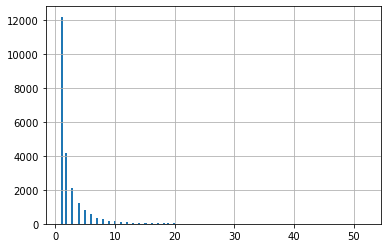

In [322]:
uds_month_by_clnt.loc[~uds_month_by_clnt['чеков']!=1,'чеков'].hist(bins=150)

In [296]:
pd.merge?

In [75]:
len(uds), len(uds['ID операции'].unique())#value_counts()

(369838, 369838)

In [34]:
len(uds['Номер чека'].unique())

233578

In [35]:
#есть повторы номера чека, надо связать с датой без тайм
uds['Номер чека'].value_counts()

402.0       10
122742.0    10
967.0        9
260.0        9
324.0        9
            ..
206193.0     1
206192.0     1
206191.0     1
84602.0      1
139708.0     1
Name: Номер чека, Length: 233577, dtype: int64

In [36]:
uds[uds['Номер чека']==402]

,ID операции,Дата,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Состояние,Филиал
25992,542758837.0,17.11.2022 11:14:27,402.0,1099563157447,Алена Окорокова,1.0,Вершинина.Н.В,Стандартная покупка,158.0,0.0,158.0,0.0,0.0,Выполнена,NaN
32959,540721890.0,13.11.2022 15:33:13,402.0,1099579595931,+79241233647,1.0,Валитова М.М.,Стандартная покупка,149.0,0.0,149.0,0.0,0.0,Выполнена,NaN
35728,539714689.0,11.11.2022 18:24:11,402.0,1099557235878,Валерия Захарова,1.0,Антонова Айхалаана,Стандартная покупка,209.0,0.0,209.0,0.0,0.0,Выполнена,NaN
130226,514115986.0,25.09.2022 18:14:45,402.0,1099560226405,Андрей Калинин,1.0,Тимофеев В.А,Стандартная покупка,330.0,0.0,250.0,80.0,0.0,Выполнена,NaN
226481,485494303.0,31.07.2022 10:49:51,402.0,1099556397873,Наталья Николаева,1.0,Кретова Татьяна Николаевна,Стандартная покупка,257.0,0.0,257.0,0.0,0.0,Выполнена,Павильон
291893,460791667.0,13.06.2022 17:21:21,402.0,1099556758192,Айталина Максимова,1.0,Горохова А.Н,Стандартная покупка,137.0,0.0,137.0,0.0,0.0,Выполнена,NaN
649,576011089.0,12.01.2023 16:21:44,402.0,1099563613434,Светлана Перцева,1.0,Афанасьева.Т.В,Стандартная покупка,385.0,0.0,385.0,0.0,0.0,Выполнена,NaN
22915,565388944.0,25.12.2022 18:21:14,402.0,1099558344922,Татьяна Туприна,1.0,Соколов Валерий,Стандартная покупка,146.0,0.0,106.0,40.0,0.0,Выполнена,NaN
41794,558699648.0,14.12.2022 19:30:13,402.0,1099575781624,Людмила Колоколова,1.0,Горохова Юлия,Стандартная покупка,240.0,0.0,209.6,30.4,0.0,Выполнена,NaN
52226,554712021.0,08.12.2022 15:35:05,402.0,1099576046970,Акбермет Эргешова,1.0,Намитова Д.А,Стандартная покупка,196.0,0.0,196.0,0.0,0.0,Выполнена,NaN


In [76]:
uds[['ID Клиента']].value_counts()

ID Клиента   
1099568819101    416
1099573960783    271
1099574317947    239
1099562805625    205
1099562529309    202
                ... 
1099573729468      1
1099573729447      1
1099573729389      1
1099573729242      1
1099583566657      1
Length: 66495, dtype: int64

In [98]:
id_cl_first50 = uds[['ID Клиента','Скидка RUB','Оплата RUB','Оплата баллы/ Оплата баллами']]\
   .groupby(by = 'ID Клиента').sum()\
   .sort_values('Оплата RUB', ascending=False).head(50)\
   .reset_index()['ID Клиента'].to_list()

In [102]:
uds.loc[uds['ID Клиента'].isin(id_cl_first50),'Клиент'].unique()

array(['Наталья Вершинина', 'Вероника Кузьмина', 'Анита Durova',
       'Надежда Макарова', 'Александр Румянцев', 'Вера Никулина',
       'Алексей Неустроев', 'Елена Агаева', 'Андрей Бирюков',
       'Павел Попов', 'Татьяна червякова', 'Виталий Журавский',
       'Леонид Кардашевский', 'Петр Дмитриев', 'Марина Местникова',
       'Георгий Замятин', 'Di Fi', 'Руслан Фын', 'Марианна Угай',
       'Прасковья Феоктистова', 'Мария Трушникова', 'Татьяна Анисимова',
       'Вероника Герусова', 'Ирина Аданина', 'Екатерина Иванова',
       'Макс Сем', 'Кира Шевченко', 'Александра Петрова', 'Яна Уарова',
       'иван бухаров', 'Александра Осипова', 'Андрей Крылов',
       'Надежда Билле', 'Георгий Птицын', 'Анна Кирилова',
       'Капиталина Семенова', 'BiGBoS S', 'Валентина Петрова',
       'лена петрова', 'Оксана Абрамова', 'Павел Васильев',
       'Марианна Максимова', 'Роза Шейхрамова', 'Устинова Светлана',
       'Волен Де Морт', 'Елена Ширшикова', 'Дарья Намитова',
       'Коробова Татьяна

# Оценка размера "подозрительных" и "групповых"

In [129]:
#Данные всей выборки по сумме
uds.groupby(by='year').aggregate({'ID операции':'count','Оплата RUB':'sum',
                                   'Оплата баллы/ Оплата баллами':'sum',
                                   'Оплата сертификатом':'sum',
                                   'Скидка RUB':'sum'})

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,357575,76937929.16,7105764.82,85017.7,0.0


In [132]:
#Сводные данные по "подозрительным" и "групповым"
uds[uds['ID Клиента'].isin(suspiciouset)].groupby(by='year').aggregate({'ID операции':'count','Оплата RUB':'sum',
                                   'Оплата баллы/ Оплата баллами':'sum',
                                   'Оплата сертификатом':'sum',
                                   'Скидка RUB':'sum'})

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,52597,10031692.11,1116984.19,12052.4,0.0


In [133]:
Процент по "подозрительным" и "групповым"
76937929.16/10031692.11

7.6694866944037425

# ABC анализ клиентов 
Проведем АВС по всей выборке за вычетом "подозрительных" и "групповых"

In [198]:
#Всего имеем клиентов UDS 
len(uds['ID Клиента'].unique())

65142

In [191]:
svod(uds)

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,357575,76937929.16,7105764.82,85017.7,0.0


#### Всего имеем клиентов которые ходят 2 и более раз в день

In [204]:
len(suspicious(uds,2))

9274

In [205]:
svod(uds[(uds['ID Клиента'].isin(suspicious(uds,2)))])

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,165994,31654144.12,3278853.68,36579.3,0.0


In [211]:
# в процентах к общему
9274/65142, 31654144.12/76937929.16

(0.14236590832335513, 0.4114244361083867)

#### Всего имеем клиентов которые ходят 3 и более раз в день

In [208]:
len(suspicious(uds,3))

1017

In [209]:
svod(uds[(uds['ID Клиента'].isin(suspicious(uds,3)))])

,ID операции,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Скидка RUB
year,,,,,
2022,35049,6311564.63,613223.97,7463.4,0.0


In [212]:
# в процентах к общему
1017/65142, 31654144.12/6311564.63

(0.015612047526941144, 5.015261028864724)

In [202]:
#
9274/65142, 31654144.12/76937929.16

(0.14236590832335513, 0.4114244361083867)

In [193]:
gdf_all_no_suspicions = ABC1(uds[~uds['ID Клиента'].isin(suspiciouset)])

ABCОплата RUB
C                23010
A                21361
B                20771
dtype: int64


In [185]:
gdf_all

,ID Клиента,Клиент,count,Оплата RUB,cumsumОплата RUB,percОплата RUB,ABCОплата RUB
30382,1099568819101,Дарья Намитова,416,93646.30,93646.30,0.001400,A
41428,1099574768293,Андрей Крылов,40,77368.80,171015.10,0.002556,A
38599,1099573960783,Екатерина Игоревна,271,49207.70,220222.80,0.003292,A
36347,1099572703615,Руслан Фын,151,41104.36,261327.16,0.003906,A
23180,1099562805625,Коробова Татьяна,205,39802.00,301129.16,0.004501,A
...,...,...,...,...,...,...,...
48297,1099576663081,+79142683514,1,18.90,66906212.05,1.000000,C
61858,1099581587527,+79246685581,1,10.00,66906222.05,1.000000,C
55559,1099579017084,+79142616170,1,5.00,66906227.05,1.000000,C
50677,1099577195042,Семен Кириллин,1,5.00,66906232.05,1.000000,C


<AxesSubplot:>

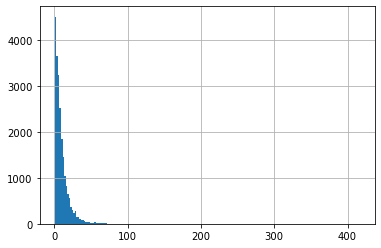

In [184]:
gdf_all.loc[gdf_all['ABCОплата RUB']=='A','count'].hist(bins=200)

### Предварительный анализ по повторяемости

In [118]:
count_clients = pd.DataFrame(uds.loc[:,['ID Клиента']].value_counts()).reset_index().rename(columns={0:'count'})

In [147]:
count_clients.describe()

,ID Клиента,count
count,6.649500e+04,66495.000000
mean,1.099568e+12,5.561892
std,9.326241e+06,10.011304
min,1.099551e+12,1.000000
25%,1.099558e+12,1.000000
50%,1.099569e+12,2.000000
75%,1.099577e+12,6.000000
max,1.099584e+12,416.000000


<AxesSubplot:>

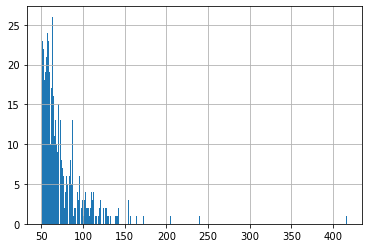

In [129]:
count_clients.loc[count_clients['count']>50,'count'].hist(bins=400)

In [152]:
count_clients.loc[count_clients['count']>=30,'count'].count()

1926

In [153]:
count_clients.loc[count_clients['count']<30,'count'].count()

64569

In [149]:
count_clients.loc[count_clients['count']==2,'count'].count()

9428

### Классический ABC по выручке

In [138]:
uds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369838 entries, 0 to 369837
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   ID операции                   369838 non-null  float64       
 1   Дата                          369838 non-null  object        
 2   Номер чека                    369793 non-null  float64       
 3   ID Клиента                    369838 non-null  int64         
 4   Клиент                        369838 non-null  object        
 5   Уровень                       369838 non-null  float64       
 6   Кассир                        369793 non-null  object        
 7   Тип операции                  369838 non-null  object        
 8   Счет RUB                      369838 non-null  float64       
 9   Скидка RUB                    369838 non-null  float64       
 10  Оплата RUB                    369838 non-null  float64       
 11  Оплата баллы/

In [139]:
uds.sample(20)

,ID операции,Дата,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Состояние,Филиал,datetime
85540,525293142.0,16.10.2022 14:36:06,86077.0,1099577317724,Алена Павлова,1.0,Петрова А.Е,Стандартная покупка,1055.0,0.0,985.0,70.0,0.0,Выполнена,NaN,2022-10-16 14:36:06
181876,499258506.0,28.08.2022 19:27:40,198834.0,1099554379775,екатерина Ядреева,1.0,Игнатьева Татьяна Егоровна,Стандартная покупка,173.8,0.0,173.8,0.0,0.0,Выполнена,203 мкрн. 8 корпус,2022-08-28 19:27:40
125056,514945929.0,27.09.2022 8:17:16,173382.0,1099566001158,Айталина Ларионова,1.0,Антонова Айхалаана,Стандартная покупка,75.0,0.0,55.0,20.0,0.0,Выполнена,NaN,2022-09-27 08:17:16
197288,494149022.0,18.08.2022 18:11:42,31619.0,1099575044508,+79142630881,1.0,Дуйшеева.М.Ж,Стандартная покупка,288.0,0.0,288.0,0.0,0.0,Выполнена,NaN,2022-08-18 18:11:42
336194,562582884.0,21.12.2022 13:13:11,43752.0,1099564570378,Мария Садовникова,1.0,Бирюкова Наталья Николаевна,Стандартная покупка,75.0,0.0,75.0,0.0,0.0,Выполнена,Павильон,2022-12-21 13:13:11
193177,495620879.0,21.08.2022 18:07:51,13327.0,1099569317091,Катерина Боярская,1.0,Фалилеев В,Стандартная покупка,69.0,0.0,69.0,0.0,0.0,Выполнена,NaN,2022-08-21 18:07:51
76416,527453332.0,20.10.2022 17:07:15,27198.0,1099556127608,Камилла Коротких,1.0,Кретова Татьяна Николаевна,Стандартная покупка,164.0,0.0,120.0,44.0,0.0,Выполнена,Павильон,2022-10-20 17:07:15
341719,560849174.0,18.12.2022 11:41:19,73553.0,1099572198639,Мария Иванова,1.0,Дуйшеева.М.Ж,Стандартная покупка,240.0,0.0,170.0,70.0,0.0,Выполнена,NaN,2022-12-18 11:41:19
184819,498072288.0,26.08.2022 17:22:56,198114.0,1099572243271,Лена Саввина,1.0,Дьяконова Елена Александровна,Стандартная покупка,60.0,0.0,60.0,0.0,0.0,Выполнена,NaN,2022-08-26 17:22:56
207320,490519728.0,11.08.2022 13:56:58,66719.0,1099563146133,Слепцова Варвара,1.0,Дуйшеева.М.Ж,Стандартная покупка,440.0,0.0,440.0,0.0,0.0,Выполнена,NaN,2022-11-08 13:56:58


In [142]:
uds.describe()

,ID операции,Номер чека,ID Клиента,Уровень,Счет RUB,Скидка RUB,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом
count,3.698380e+05,369793.000000,3.698380e+05,369838.000000,369838.000000,369838.0,369838.000000,369838.000000,369838.000000
mean,5.148415e+08,119420.464809,1.099564e+12,1.021123,236.952177,0.0,216.552173,20.168992,0.231012
std,3.316928e+07,97380.078521,8.576236e+06,0.182004,212.678040,0.0,200.813087,38.853170,4.782379
min,4.536249e+08,1.000000,1.099551e+12,1.000000,3.960000,0.0,3.960000,0.000000,0.000000
25%,4.885207e+08,32263.000000,1.099557e+12,1.000000,112.000000,0.0,98.000000,0.000000,0.000000
50%,5.157328e+08,91592.000000,1.099561e+12,1.000000,174.000000,0.0,158.000000,0.000000,0.000000
75%,5.418447e+08,198071.000000,1.099572e+12,1.000000,283.350000,0.0,259.000000,30.000000,0.000000
max,5.763304e+08,320703.000000,1.099584e+12,6.000000,10315.000000,0.0,10077.000000,1000.000000,300.000000


In [144]:
uds[uds['Оплата RUB']==3.960000]

,ID операции,Дата,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Состояние,Филиал,datetime
309687,574874075.0,10.01.2023 16:27:35,7872.0,1099557270787,Наталья Габышева,1.0,Валитова М.М.,Стандартная покупка,3.96,0.0,3.96,0.0,0.0,Выполнена,NaN,2023-10-01 16:27:35


In [157]:
uds[uds['ID Клиента']==1099557270787].sort_values('datetime', ascending=False)

,ID операции,Дата,Номер чека,ID Клиента,Клиент,Уровень,Кассир,Тип операции,Счет RUB,Скидка RUB,Оплата RUB,Оплата баллы/ Оплата баллами,Оплата сертификатом,Состояние,Филиал,datetime
308516,575333009.0,11.01.2023 13:29:42,7928.0,1099557270787,Наталья Габышева,1.0,Кочнев Николай,Стандартная покупка,75.00,0.0,75.00,0.0,0.0,Выполнена,NaN,2023-11-01 13:29:42
309687,574874075.0,10.01.2023 16:27:35,7872.0,1099557270787,Наталья Габышева,1.0,Валитова М.М.,Стандартная покупка,3.96,0.0,3.96,0.0,0.0,Выполнена,NaN,2023-10-01 16:27:35
311111,574245390.0,09.01.2023 16:33:24,7765.0,1099557270787,Наталья Габышева,1.0,Валитова М.М.,Стандартная покупка,725.00,0.0,508.00,217.0,0.0,Выполнена,NaN,2023-09-01 16:33:24
35923,539437185.0,11.11.2022 12:48:20,107.0,1099557270787,Наталья Габышева,1.0,Егорова Е.П.,Стандартная покупка,1264.00,0.0,1249.00,15.0,0.0,Выполнена,NaN,2022-11-11 12:48:20
131282,512861373.0,23.09.2022 15:40:01,116854.0,1099557270787,Наталья Габышева,1.0,Иванова Альбина Николаевна,Стандартная покупка,602.00,0.0,460.00,142.0,0.0,Выполнена,Ойунского,2022-09-23 15:40:01
201050,493038520.0,16.08.2022 12:41:00,108368.0,1099557270787,Наталья Габышева,1.0,Иванова Альбина Николаевна,Стандартная покупка,1361.00,0.0,1236.00,125.0,0.0,Выполнена,Ойунского,2022-08-16 12:41:00
201060,493038095.0,16.08.2022 12:37:56,108367.0,1099557270787,Наталья Габышева,1.0,Иванова Альбина Николаевна,Стандартная покупка,1316.00,0.0,1316.00,0.0,0.0,Выполнена,Ойунского,2022-08-16 12:37:56
359034,554066003.0,07.12.2022 13:04:54,3571.0,1099557270787,Наталья Габышева,1.0,Валитова М.М.,Стандартная покупка,814.00,0.0,814.00,0.0,0.0,Выполнена,NaN,2022-07-12 13:04:54
272304,466159523.0,22.06.2022 16:31:00,96901.0,1099557270787,Наталья Габышева,1.0,Иванова Альбина Николаевна,Стандартная покупка,1320.00,0.0,1180.00,140.0,0.0,Выполнена,Ойунского,2022-06-22 16:31:00
166169,503766409.0,06.09.2022 12:47:01,113300.0,1099557270787,Наталья Габышева,1.0,Иванова Альбина Николаевна,Стандартная покупка,709.00,0.0,497.00,212.0,0.0,Выполнена,Ойунского,2022-06-09 12:47:01


# Merge iiko

In [62]:
udsgroup = uds[['Кассир','Оплата RUB']].groupby(by='Кассир').count()

In [60]:
cashierkassa = iiko1.loc[~iiko1[['№ кассы','Официант']].duplicated(),['№ кассы','Официант']].dropna(subset=['Официант'])

In [63]:
pd.merge(left=udsgroup, right=cashierkassa, how='left', left_on='Кассир', right_on='Официант')

,Оплата RUB,№ кассы,Официант
0,50,NaN,NaN
1,95,47.0,Афанасьева.Т.В
2,56,34.0,Букарева Евгения Сергеевна
3,57,50.0,Бурдуковская Э.В.
4,56,27.0,Воронина С.А.
5,16,36.0,Дилоян Арман Серобович
6,89,NaN,NaN
7,15,NaN,NaN
8,23,NaN,NaN
9,144,30.0,Игнатьева Татьяна Егоровна


In [65]:
cashierkassa

,№ кассы,Официант
1,6,Рыспаева Айсулуу Жакшылыковна
205,8,Коробова Татьяна Анатольевна
329,50,Бурдуковская Э.В.
429,13,Кичигина.ЕН
651,15,Тельнова Лидия Александровна
764,17,Чириков Николай Леонидович
782,17,Сухарь Юлия Вячеславовна
835,23,Дуйшеева Майрамкул Жусуевна
997,27,Воронина С.А.
1084,25,Болдырева Александра Ивановна


In [64]:
udsgroup

,Оплата RUB
Кассир,
Boldyreva,50
Афанасьева.Т.В,95
Букарева Евгения Сергеевна,56
Бурдуковская Э.В.,57
Воронина С.А.,56
Дилоян Арман Серобович,16
Дуйшеева.М.Ж,89
Дурова А,15
Ефремова Анна Сергеевна,23


In [ ]:
astype

### Проблема с датой в UDS

In [159]:
uds['datetime64'] = uds['Дата'].astype('datetime64')

In [48]:
uds['datetime'] = pd.to_datetime(uds['Дата'])

In [161]:
uds[['Дата','datetime','datetime64']].sample(20)

,Дата,datetime,datetime64
165208,06.09.2022 18:25:06,2022-06-09 18:25:06,2022-06-09 18:25:06
319902,30.12.2022 14:38:40,2022-12-30 14:38:40,2022-12-30 14:38:40
206274,12.08.2022 11:24:39,2022-12-08 11:24:39,2022-12-08 11:24:39
72242,22.10.2022 16:03:41,2022-10-22 16:03:41,2022-10-22 16:03:41
192264,22.08.2022 13:22:11,2022-08-22 13:22:11,2022-08-22 13:22:11
114453,02.10.2022 11:58:46,2022-02-10 11:58:46,2022-02-10 11:58:46
3842,28.11.2022 20:00:25,2022-11-28 20:00:25,2022-11-28 20:00:25
79934,19.10.2022 10:43:59,2022-10-19 10:43:59,2022-10-19 10:43:59
222400,30.07.2022 14:21:11,2022-07-30 14:21:11,2022-07-30 14:21:11
333073,23.12.2022 8:10:50,2022-12-23 08:10:50,2022-12-23 08:10:50


In [162]:
pd.to_datetime('11.01.2023 18:59:54')

Timestamp('2023-11-01 18:59:54')

In [163]:
pd.to_datetime('24.08.2022 17:25:56')

Timestamp('2022-08-24 17:25:56')

In [177]:
t = pd.DataFrame({'data_text':['11.01.2023 18:59:54',
                               '13.01.2023 18:59:54',
                               '24.08.2022 17:25:56',
                               '04.08.2022 17:25:56',
                               '05.03.2023 12:00:54']})

t['astype'] = t['data_text'].astype('datetime64')
t['pd.to_datetime'] = t['data_text'].map(pd.to_datetime)
t

In [70]:
uds.reset_index(drop=True, inplace=True)

In [71]:
uds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369838 entries, 0 to 369837
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   ID операции                   369838 non-null  float64       
 1   Дата                          369838 non-null  object        
 2   Номер чека                    369793 non-null  float64       
 3   ID Клиента                    369838 non-null  int64         
 4   Клиент                        369838 non-null  object        
 5   Уровень                       369838 non-null  float64       
 6   Кассир                        369793 non-null  object        
 7   Тип операции                  369838 non-null  object        
 8   Счет RUB                      369838 non-null  float64       
 9   Скидка RUB                    369838 non-null  float64       
 10  Оплата RUB                    369838 non-null  float64       
 11  Оплата баллы/

In [155]:
uds['Дата'].to_date

AttributeError: 'Series' object has no attribute 'to_date'

In [72]:
uds.loc[0,'datetime'].strftime('%Y-%m-%d')#strftime('%Y-%m-%d')

'2022-11-30'

In [182]:
pd.to_datetime('11.01.2023 18:59:54',
               format='%d.%m.%Y %H:%M:%S')
# --> Timestamp('2023-01-11 18:59:54')

Timestamp('2023-01-11 18:59:54')

In [183]:
uds['datetime64'] = uds['Дата'].astype

Object `astype` not found.


In [ ]:
uds['datetime64'] = uds['Дата'].astype

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
df = pd.DataFrame(np.random.normal(size=(200,2)), columns=['A', 'B'])

# plot melted dataframe in a single command
sns.histplot(df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20);